# **Projecto de análises de dados para depósitos aluvionares**

---

### **Primeria Tarefa:**

* Importar a base de dados.

In [15]:
import pandas as pd 
import numpy as np 
import seaborn as srn 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
# Use the inline backend to generate the plots within the browser
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import joblib
import warnings 
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('NP.csv')
df = pd.DataFrame(df)

In [17]:
headers = ['Blocos', 'Volume', 'Np', 'Qts', 'Teor', 'Tp', 'Deposito']

In [18]:
df.columns = headers 
df.columns

Index(['Blocos', 'Volume', 'Np', 'Qts', 'Teor', 'Tp', 'Deposito'], dtype='object')

---

### **Segunda Tarefa**:

* Pre-processamento dos dados

In [19]:
df.drop(columns=['Blocos'], axis=1, inplace=True)
df.head(5)

,Volume,Np,Qts,Teor,Tp,Deposito
0,248,113,19.16,0.08,0.17,TER-LEZ
1,676,138,39.44,0.06,0.20,LEZIRIA
2,1432,149,45.66,0.03,0.31,TERRAÇO
3,652,187,63.07,0.10,0.34,TER-FLUVIAL
4,2280,217,106.00,0.05,0.49,TERRAÇO


In [20]:
len(df)

45

In [21]:
df.replace('?', np.nan, inplace=True)

In [22]:
missing_data = df.isnull()

In [23]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())

Volume
Volume
False    45
Name: count, dtype: int64
Np
Np
False    45
Name: count, dtype: int64
Qts
Qts
False    45
Name: count, dtype: int64
Teor
Teor
False    45
Name: count, dtype: int64
Tp
Tp
False    45
Name: count, dtype: int64
Deposito
Deposito
False    45
Name: count, dtype: int64


In [24]:
df.dtypes

Volume        int64
Np            int64
Qts         float64
Teor        float64
Tp          float64
Deposito     object
dtype: object

In [25]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 6 entries, Volume to Deposito
dtypes: float64(3), int64(2), object(1)
memory usage: 2.2+ KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Volume    45 non-null     int64  
 1   Np        45 non-null     int64  
 2   Qts       45 non-null     float64
 3   Teor      45 non-null     float64
 4   Tp        45 non-null     float64
 5   Deposito  45 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 2.2+ KB


In [27]:
desc = pd.DataFrame(index = list(df))
desc['type'] = df.dtypes                                                 # This column stores the data type of each column.
desc['count'] = df.count()                                               # This column stores the number of non-null values in each column.
desc['nunique'] = df.nunique()                                           # This column stores the number of unique values in each column.
desc['%unique'] = desc['nunique'] /len(df) * 100                          # This column stores the percentage of unique values in each column.
desc['null'] = df.isnull().sum()                                         # This column stores the number of null values in each column.
desc['%null'] = desc['null'] / len(df) * 100                             # This column stores the percentage of null values in each column.
desc = pd.concat([desc,df.describe().T.drop('count',axis=1)],axis=1)     # This line concatenates the 'desc' DataFrame with the descriptive statistics of the 'df_house' DataFrame.
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='pink')\
    .bar(subset=['std'],color='lightblue')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
Volume,int64,45,44,97.777778,0,0.000000,1901.666667,789.288229,248.000000,1199.000000,2124.000000,2492.000000,3212.000000
Np,int64,45,45,100.000000,0,0.000000,934.288889,993.117512,113.000000,354.000000,654.000000,1055.000000,5290.000000
Qts,float64,45,45,100.000000,0,0.000000,176.201333,118.132506,19.160000,95.110000,147.840000,233.820000,663.310000
Teor,float64,45,18,40.000000,0,0.000000,0.094444,0.055209,0.020000,0.060000,0.080000,0.110000,0.290000
Tp,float64,45,24,53.333333,0,0.000000,0.241111,0.092226,0.110000,0.180000,0.240000,0.270000,0.530000
Deposito,object,45,4,8.888889,0,0.000000,nan,nan,nan,nan,nan,nan,nan


---

### **Terceira Tarefa**

* Análise de dados exploratória 

In [28]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [29]:
correlation = numeric_df.corr()
correlation

,Volume,Np,Qts,Teor,Tp
Volume,1.000000,0.330758,0.453073,-0.171924,-0.063182
Np,0.330758,1.000000,0.932557,0.718891,-0.544748
Qts,0.453073,0.932557,1.000000,0.722256,-0.329128
Teor,-0.171924,0.718891,0.722256,1.000000,-0.298717
Tp,-0.063182,-0.544748,-0.329128,-0.298717,1.000000


In [30]:
descritive_1 = numeric_df.describe()
descritive_1

,Volume,Np,Qts,Teor,Tp
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1901.666667,934.288889,176.201333,0.094444,0.241111
std,789.288229,993.117512,118.132506,0.055209,0.092226
min,248.000000,113.000000,19.160000,0.020000,0.110000
25%,1199.000000,354.000000,95.110000,0.060000,0.180000
50%,2124.000000,654.000000,147.840000,0.080000,0.240000
75%,2492.000000,1055.000000,233.820000,0.110000,0.270000
max,3212.000000,5290.000000,663.310000,0.290000,0.530000


In [31]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.head(5)

,Deposito
0,TER-LEZ
1,LEZIRIA
2,TERRAÇO
3,TER-FLUVIAL
4,TERRAÇO


In [32]:
descritive_2 = categorical_df.describe()
descritive_2

,Deposito
count,45
unique,4
top,TERRAÇO
freq,15


* #### **Correlação de Pearson**

In [33]:
pearson_coef, p_value = stats.pearsonr(df.Volume, df.Qts)
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)

Pearson Correlation Coefficient: 0.4530729464255103
P-value: 0.0017761016995741761


In [34]:
pearson_coef, p_value = stats.pearsonr(df.Np, df.Qts)
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)

Pearson Correlation Coefficient: 0.9325568025908745
P-value: 1.2178243790113597e-20


In [35]:
pearson_coef, p_value = stats.pearsonr(df.Teor, df.Qts)
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)

Pearson Correlation Coefficient: 0.7222557199323529
P-value: 2.137975173519588e-08


In [36]:
pearson_coef, p_value = stats.pearsonr(df.Tp, df.Qts)
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)

Pearson Correlation Coefficient: -0.329128079585418
P-value: 0.027269369629713193


**Conclusão**: 

* Para o ``Tp`` o coeficiente de correlação é de ``-0.32`` sendo negativa e fraca mas P-value igual a ``0.02`` sendo menor que 0.05 e indicando um coeficiente de correlação estatisticamente significativo.  

* Para o ``volume`` o coeficiente de correlação é de ``0.45`` sendo positiva mas fraca-moderada, e o P-value igual a ``0.0017`` sendo menor que 0.05 e indicando um coeficiente de correlação estatisticamente significativo. 

* Para o ``Np`` e o ``Teor`` o coeficiente de correlação foi alto com uma p-value altamente estatisticamente significante para as duas variavéis.

Com essas conclusões podemos notar que tanto o ``Np`` como o `Teor` destacam-se como as variáveis que causam impacto na recuperação dos quilates.


---

* ### **Volume**

In [37]:
df_volume = df.groupby(["Deposito"])['Volume'].sum().reset_index()
df_volume_S = df.groupby(["Deposito"])['Volume'].sum().reset_index()
df_volume_S.set_index('Deposito', inplace=True)
# df_volume = df_volume.transpose()
df_volume_S

,Volume
Deposito,
LEZIRIA,18976
TER-FLUVIAL,13765
TER-LEZ,21390
TERRAÇO,31444


In [38]:
def create_waffle_chart(categories, dataframe, column, values, height, width, colormap, value_sign=''):

    total_values = dataframe[column].sum()
    category_proportions = dataframe[column] / total_values

    total_num_tiles = width * height
    print('Total number of tiles is', total_num_tiles)

    tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

    for i, tiles in enumerate(tiles_per_category):
        print(categories[i] + ': ' + str(tiles))

    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1

            waffle_chart[row, col] = category_index

    fig = plt.figure()

    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + '(' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + '(' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1))

    plt.show()

Total number of tiles is 400
LEZIRIA: 89
TER-FLUVIAL: 64
TER-LEZ: 100
TERRAÇO: 147


<Figure size 640x480 with 0 Axes>

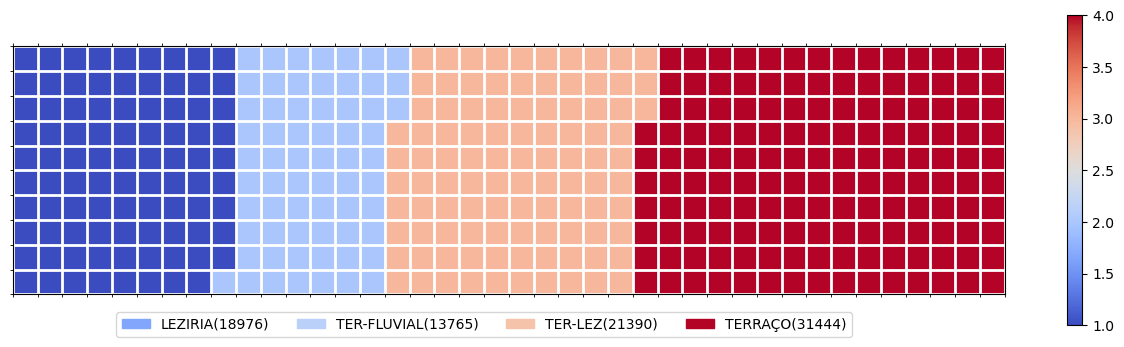

In [39]:
width = 40 # width of chart 
heigth = 10 # heigth chart 
dataframe = df_volume_S 
column = 'Volume'

categories = df_volume_S.index.values  # categories 
values = df_volume_S['Volume']         # corresponding values of categories 

colormap = plt.cm.coolwarm       # Color map class 


create_waffle_chart(categories, dataframe, column, values, heigth, width, colormap)

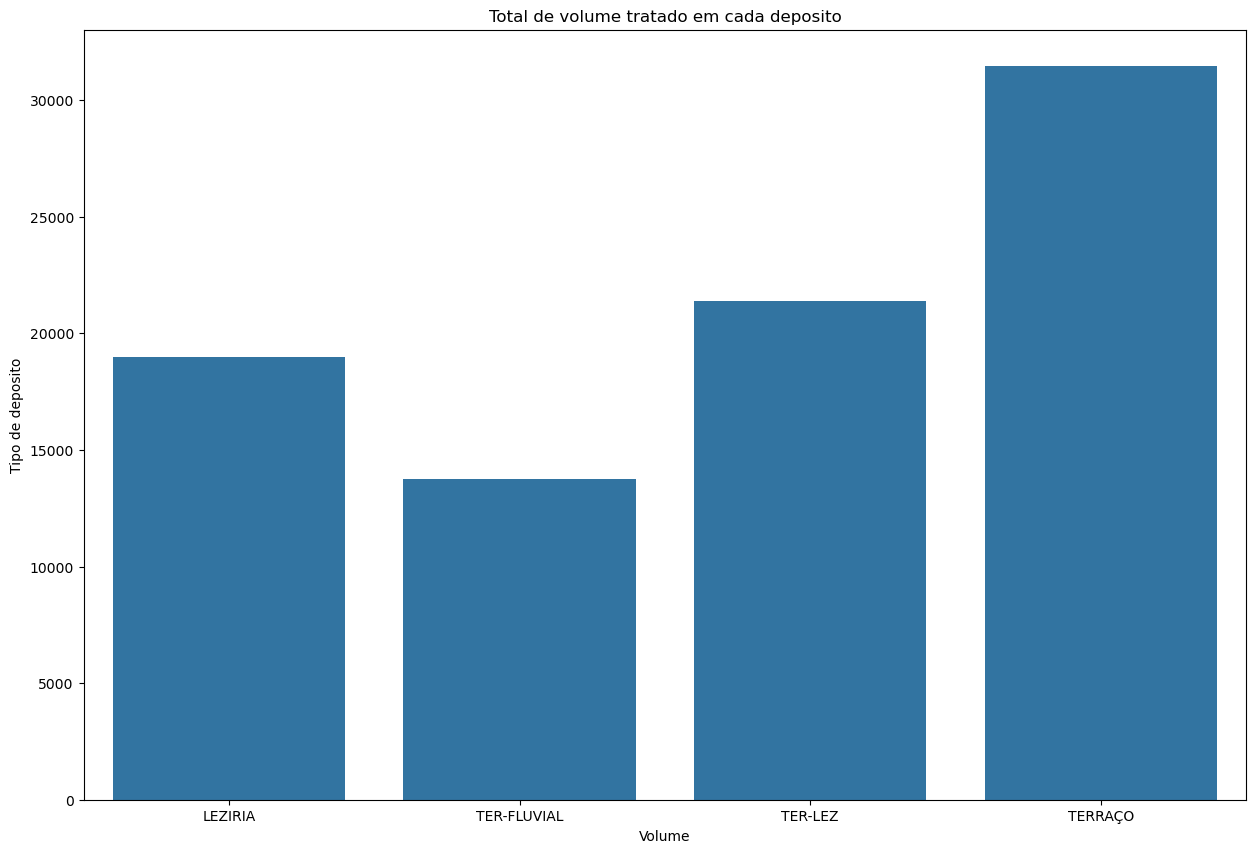

In [40]:
plt.figure(figsize=(15, 10))
srn.barplot(x='Deposito', y='Volume', data=df_volume_S)

plt.title('Total de volume tratado em cada deposito')
plt.xlabel('Volume')
plt.ylabel('Tipo de deposito')

plt.show()

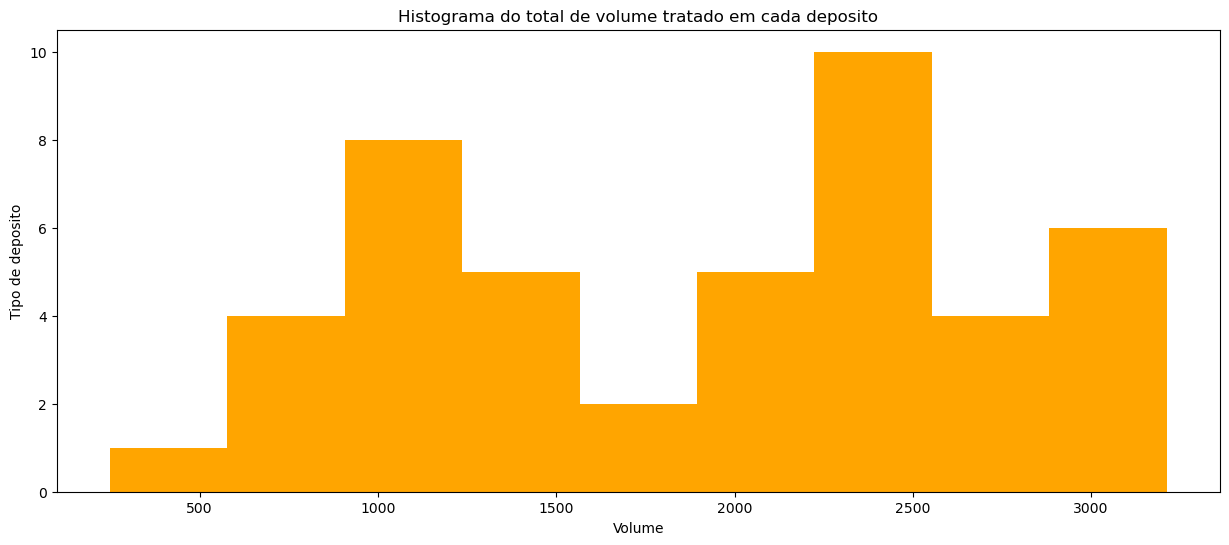

In [41]:
df['Volume'].plot(kind='hist', color='orange', bins=9, figsize=(15, 6))

plt.title('Histograma do total de volume tratado em cada deposito')
plt.xlabel('Volume')
plt.ylabel('Tipo de deposito')

plt.show()

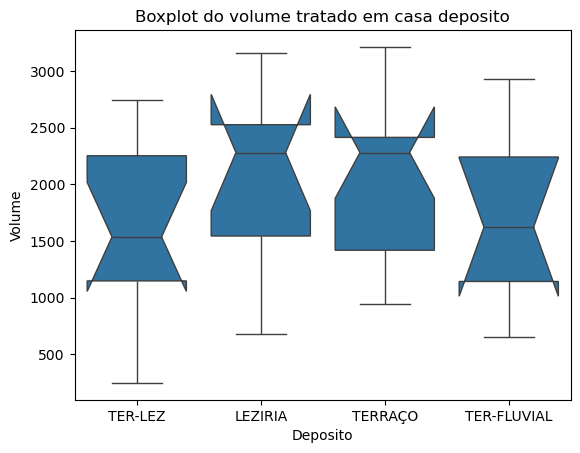

In [42]:
# Boxplot para as colunas 'Deposito' e 'Volume'. 
df['Deposito'].unique()

srn.boxplot(
            x='Deposito',
            y='Volume', 
            data=df, 
            orient='v', 
            #color='orange',
            notch=True).set_title('Boxplot do volume tratado em casa deposito')
 
plt.show()

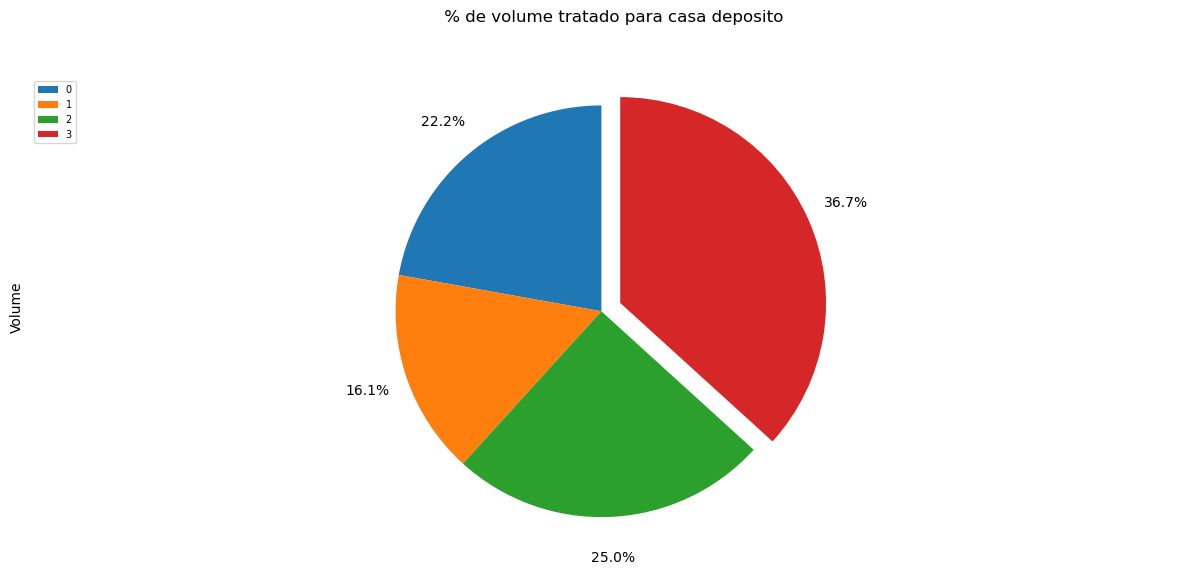

In [43]:
color_list = ['gold', 'yellowgreen', 'blue', 'lightskyblue']

explode_list = [0, 0, 0, 0.1] 

df_volume_S['Volume'].plot(kind='pie', 
                            figsize=(15, 6),
                            autopct='%1.1f%%',     
                            startangle=90,         
                            #shadow=True,           
                            labels=None,           
                            pctdistance=1.20,       
                            explode=explode_list    
                            )


# scale the title up by 12% to match pctdistance 
plt.title(' % de volume tratado para casa deposito', y=1.10)

# Sets the pie chart to look like a circle.
plt.axis('equal') 

# Add legend
plt.legend(labels=df_volume.index, loc='upper left', fontsize=7)

plt.show()

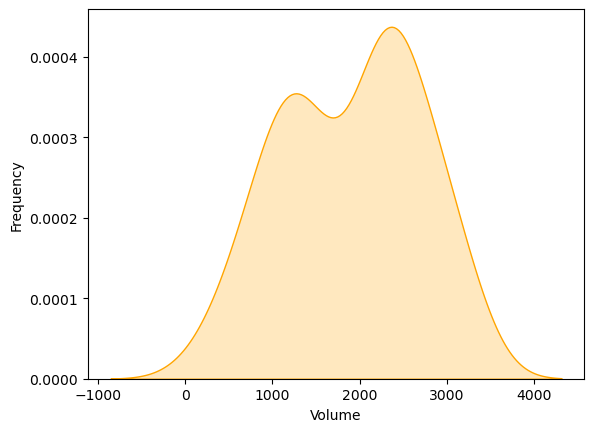

In [44]:
srn.kdeplot(df.Volume, shade=True, color='orange')
plt.ylabel('Frequency')
plt.xlabel('Volume')

plt.show()

---

* ### **Quilates**

In [45]:
df_qts_S = df.groupby(["Deposito"])['Qts'].sum().reset_index().round(2)
df_qts_S.set_index('Deposito', inplace=True)
df_qts_S_mean = df.groupby(["Deposito"])['Qts'].mean().reset_index().round(2)
df_qts_S_mean.set_index('Deposito', inplace=True)

Total number of tiles is 400
LEZIRIA: 94
TER-FLUVIAL: 78
TER-LEZ: 111
TERRAÇO: 117


<Figure size 640x480 with 0 Axes>

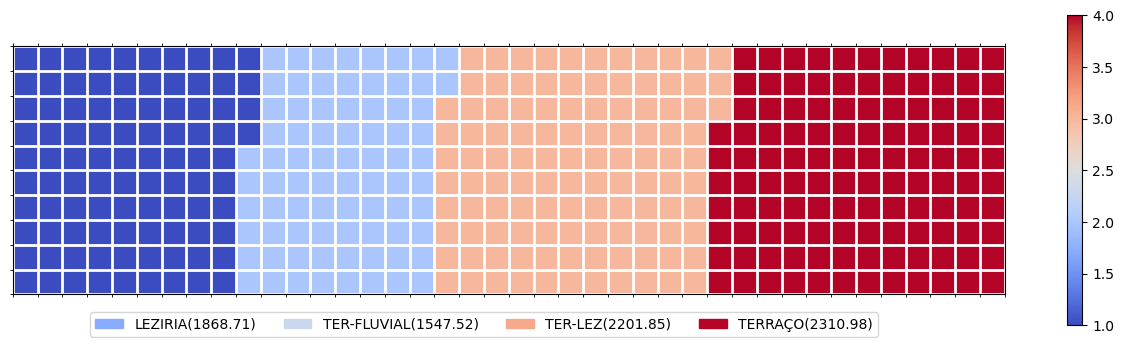

In [46]:
width = 40 # width of chart 
heigth = 10 # heigth chart 
dataframe = df_qts_S 
column = 'Qts'

categories = df_qts_S.index.values  # categories 
values = df_qts_S['Qts']         # corresponding values of categories 

colormap = plt.cm.coolwarm       # Color map class 


create_waffle_chart(categories, dataframe, column, values, heigth, width, colormap)

Total number of tiles is 400
LEZIRIA: 115
TER-FLUVIAL: 107
TER-LEZ: 94
TERRAÇO: 85


<Figure size 640x480 with 0 Axes>

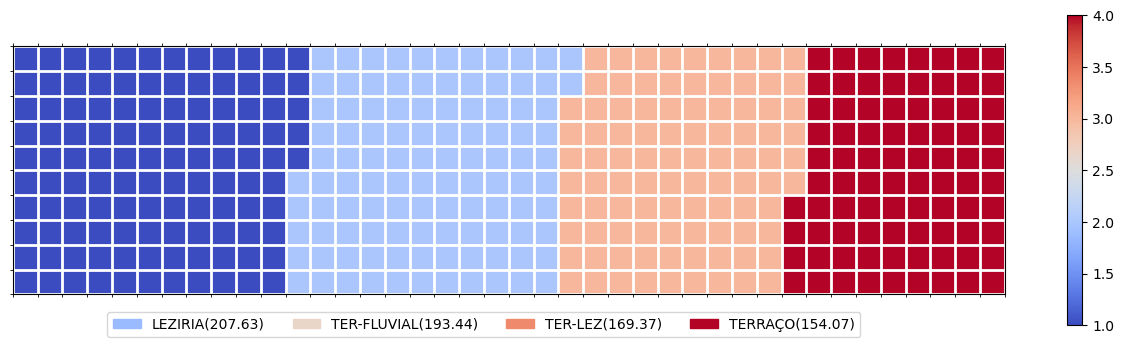

In [47]:
width = 40 # width of chart 
heigth = 10 # heigth chart 
dataframe = df_qts_S_mean 
column = 'Qts'

categories = df_qts_S_mean.index.values  # categories 
values = df_qts_S_mean['Qts']          # corresponding values of categories 

colormap = plt.cm.coolwarm       # Color map class 

create_waffle_chart(categories, dataframe, column, values, heigth, width, colormap)

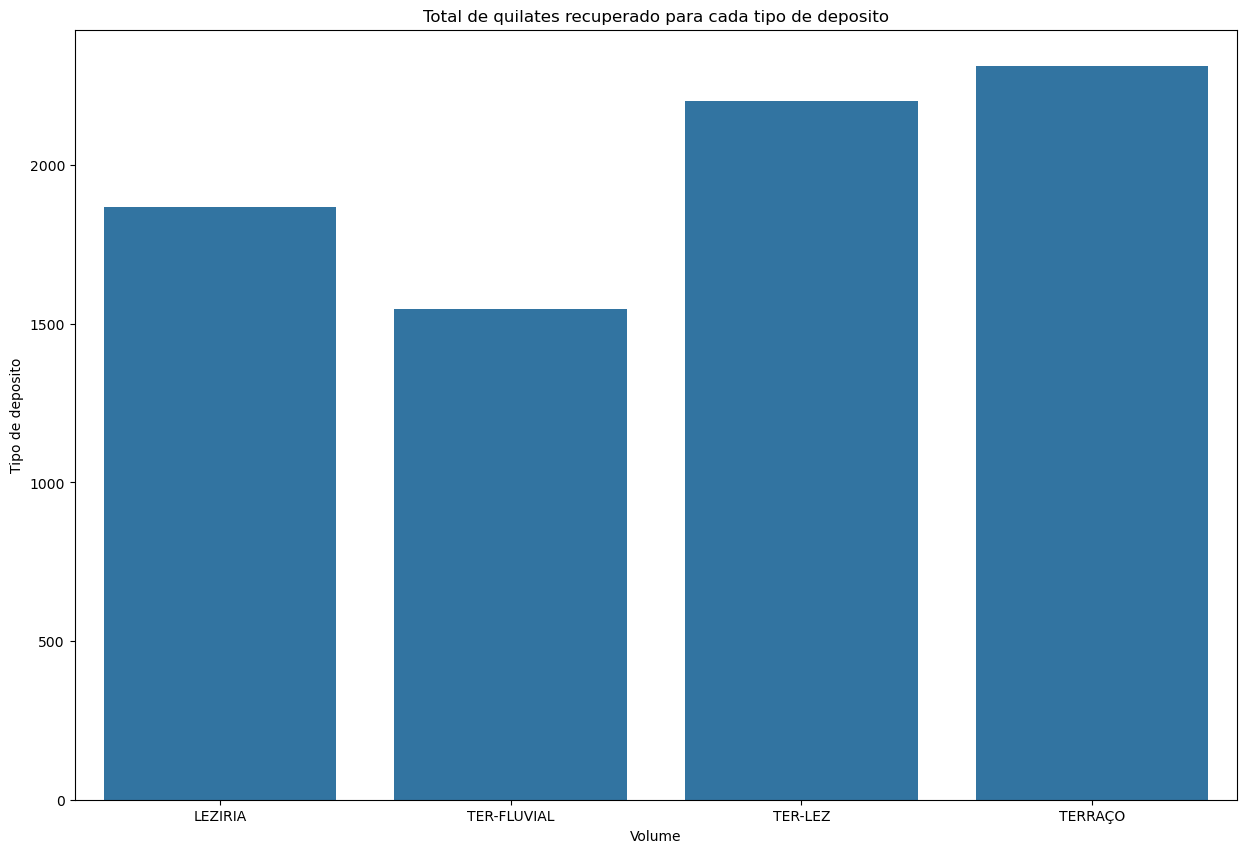

In [48]:
plt.figure(figsize=(15, 10))
srn.barplot(x='Deposito', y='Qts', data=df_qts_S)

plt.title('Total de quilates recuperado para cada tipo de deposito')
plt.xlabel('Volume')
plt.ylabel('Tipo de deposito')

plt.show()

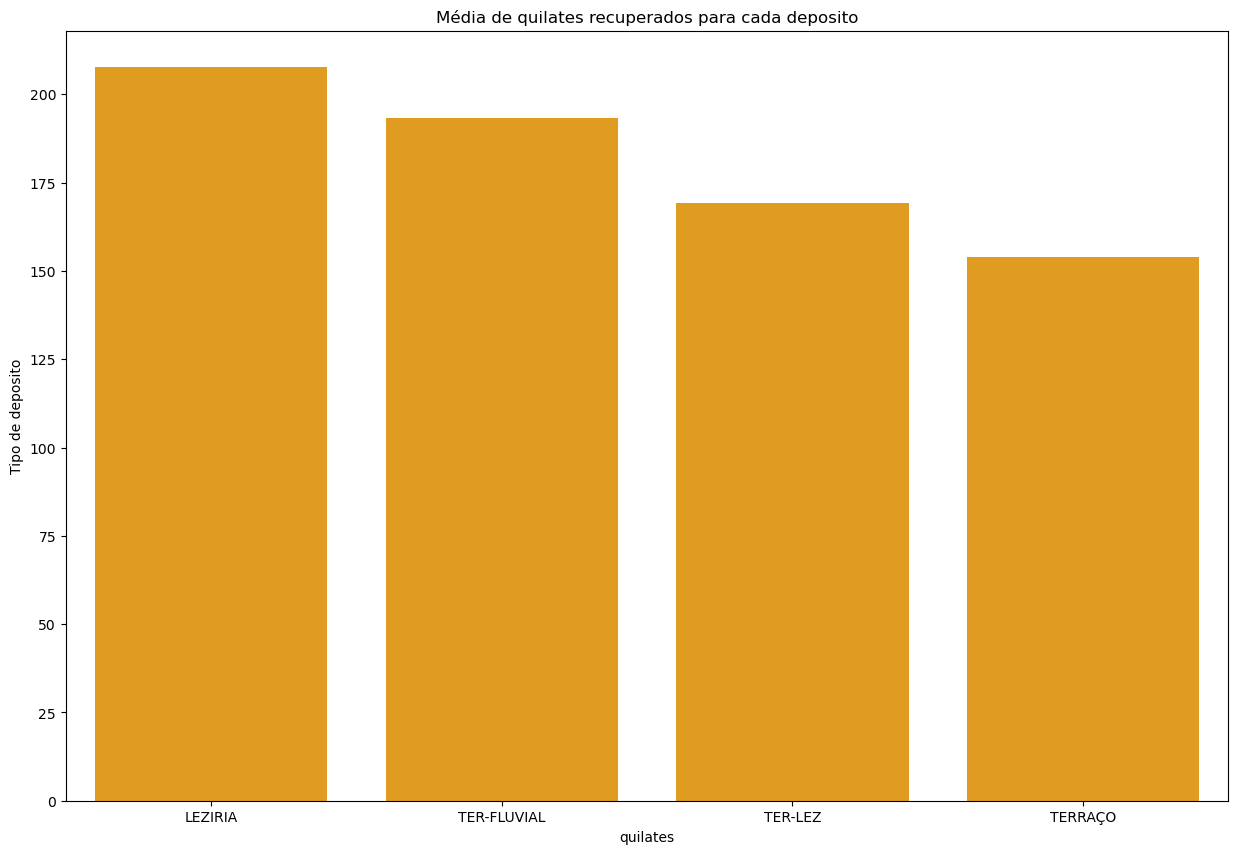

In [49]:
plt.figure(figsize=(15, 10))
srn.barplot(x='Deposito', y='Qts',color='orange', data=df_qts_S_mean)

plt.title('Média de quilates recuperados para cada deposito')
plt.xlabel('quilates')
plt.ylabel('Tipo de deposito')

plt.show()

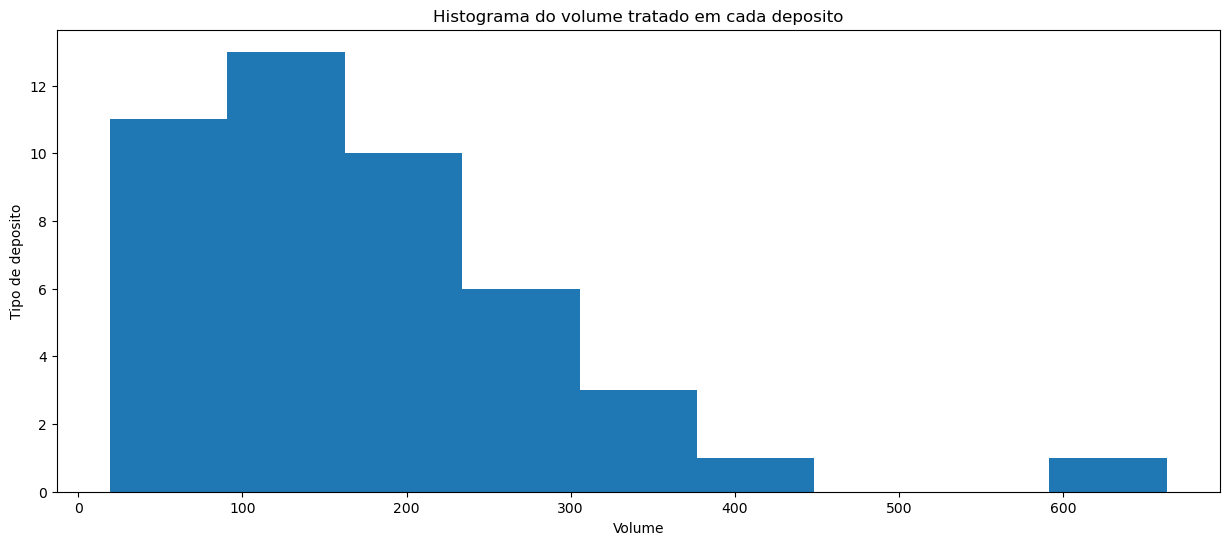

In [50]:
df['Qts'].plot(kind='hist', bins=9, figsize=(15, 6))

plt.title('Histograma do volume tratado em cada deposito')
plt.xlabel('Volume')
plt.ylabel('Tipo de deposito')

plt.show()

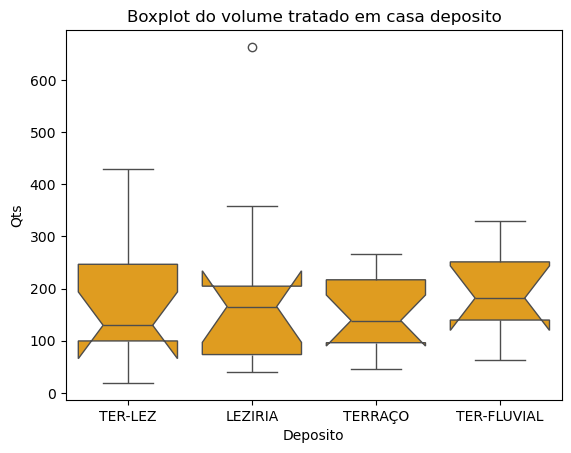

In [51]:
# Boxplot para as colunas 'Deposito' e 'Volume'. 
df['Deposito'].unique()

srn.boxplot(
            x='Deposito',
            y='Qts', 
            data=df, 
            orient='v', 
            color='orange',
            notch=True).set_title('Boxplot do volume tratado em casa deposito')

plt.show()

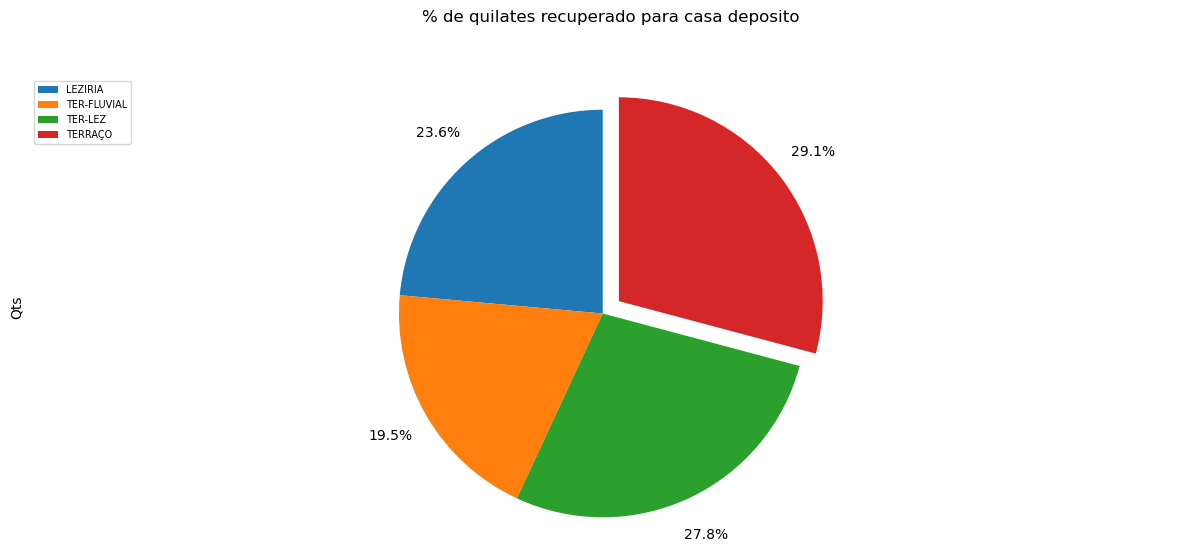

In [52]:
color_list = ['gold', 'yellowgreen', 'blue', 'lightskyblue']

explode_list = [0, 0, 0, 0.1] 

df_qts_S['Qts'].plot(kind='pie', 
                            figsize=(15, 6),
                            autopct='%1.1f%%',     
                            startangle=90,         
                            #shadow=True,           
                            labels=None,           
                            pctdistance=1.20,       
                            explode=explode_list    
                            )


# scale the title up by 12% to match pctdistance 
plt.title('% de quilates recuperado para casa deposito', y=1.10)

# Sets the pie chart to look like a circle.
plt.axis('equal') 

# Add legend
plt.legend(labels=df_qts_S.index, loc='upper left', fontsize=7)

plt.show()

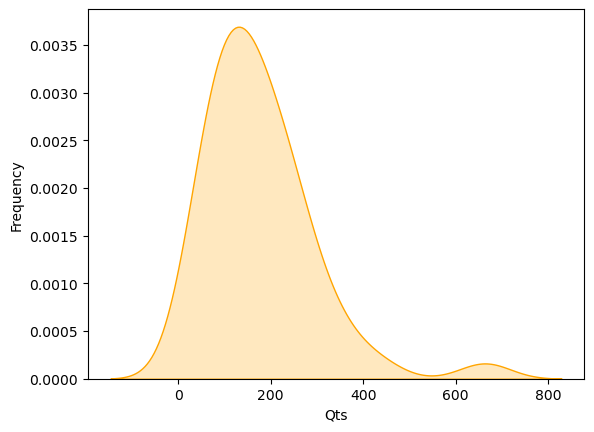

In [53]:
srn.kdeplot(df.Qts, shade=True, color='orange')
plt.ylabel('Frequency')
plt.xlabel('Qts')

plt.show()

---

* ### **Np**

In [54]:
df_np_S = df.groupby(["Deposito"])['Np'].sum().reset_index().round(2)
df_np_S.set_index('Deposito', inplace=True)
df_np_S_mean = df.groupby(["Deposito"])['Np'].mean().reset_index().round(2)
df_np_S_mean.set_index('Deposito', inplace=True)

Total number of tiles is 400
LEZIRIA: 108
TER-FLUVIAL: 79
TER-LEZ: 107
TERRAÇO: 106


<Figure size 640x480 with 0 Axes>

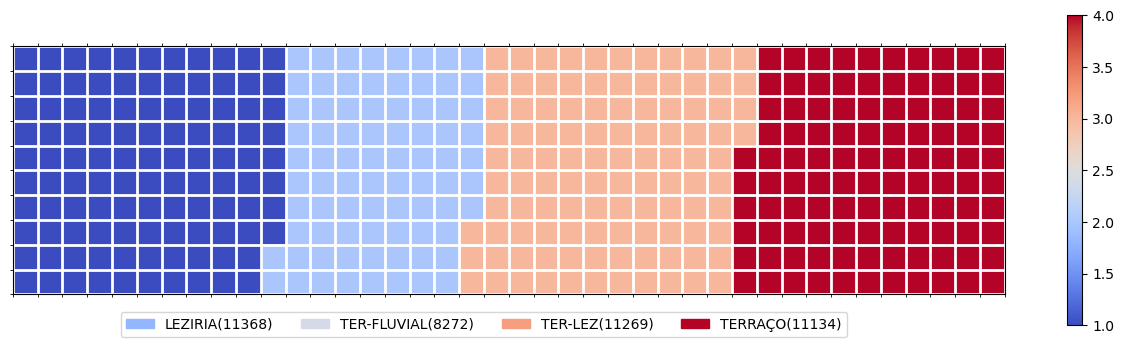

In [55]:
width = 40 # width of chart 
heigth = 10 # heigth chart 
dataframe = df_np_S 
column = 'Np'

categories = df_np_S.index.values  # categories 
values = df_np_S['Np']         # corresponding values of categories 

colormap = plt.cm.coolwarm       # Color map class 


create_waffle_chart(categories, dataframe, column, values, heigth, width, colormap)

Total number of tiles is 400
LEZIRIA: 129
TER-FLUVIAL: 106
TER-LEZ: 89
TERRAÇO: 76


<Figure size 640x480 with 0 Axes>

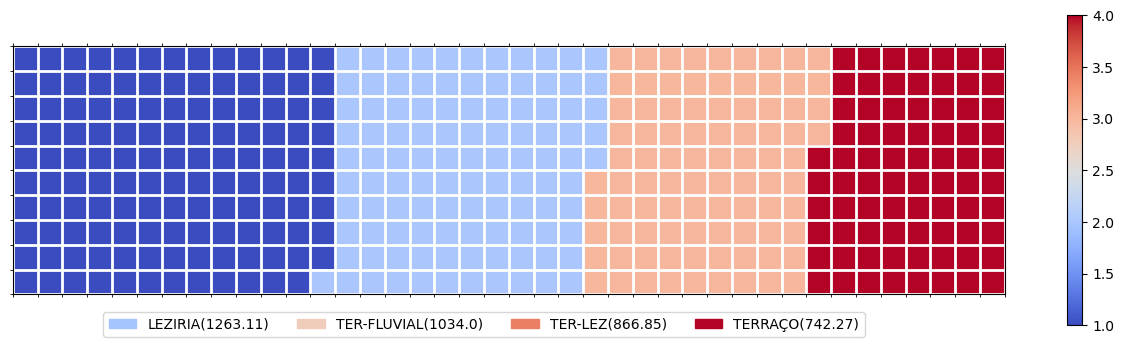

In [56]:
width = 40 # width of chart 
heigth = 10 # heigth chart 
dataframe = df_np_S_mean 
column = 'Np'

categories = df_np_S_mean.index.values  # categories 
values = df_np_S_mean['Np']         # corresponding values of categories 

colormap = plt.cm.coolwarm       # Color map class 


create_waffle_chart(categories, dataframe, column, values, heigth, width, colormap)

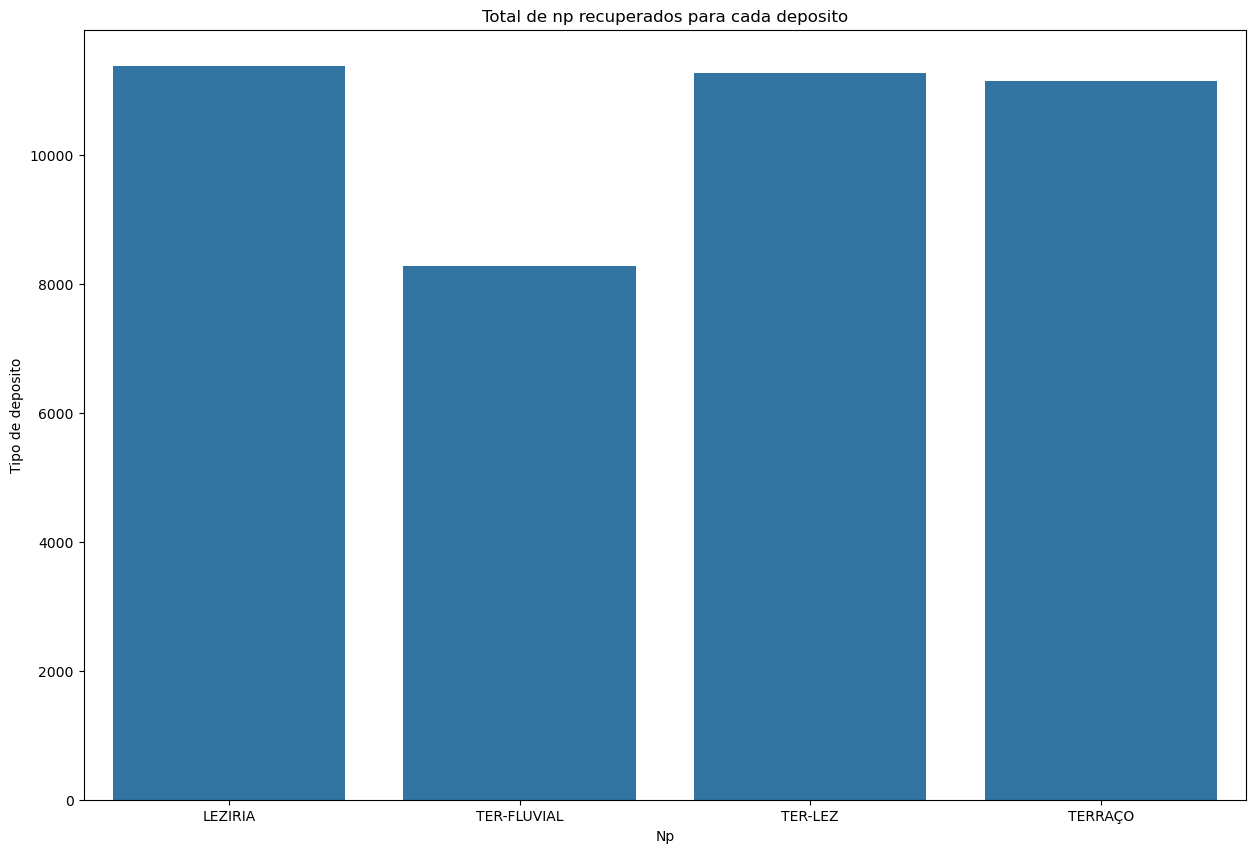

In [57]:
plt.figure(figsize=(15, 10))
srn.barplot(x='Deposito', y='Np', data=df_np_S)

plt.title('Total de np recuperados para cada deposito')
plt.xlabel('Np')
plt.ylabel('Tipo de deposito')

plt.show()

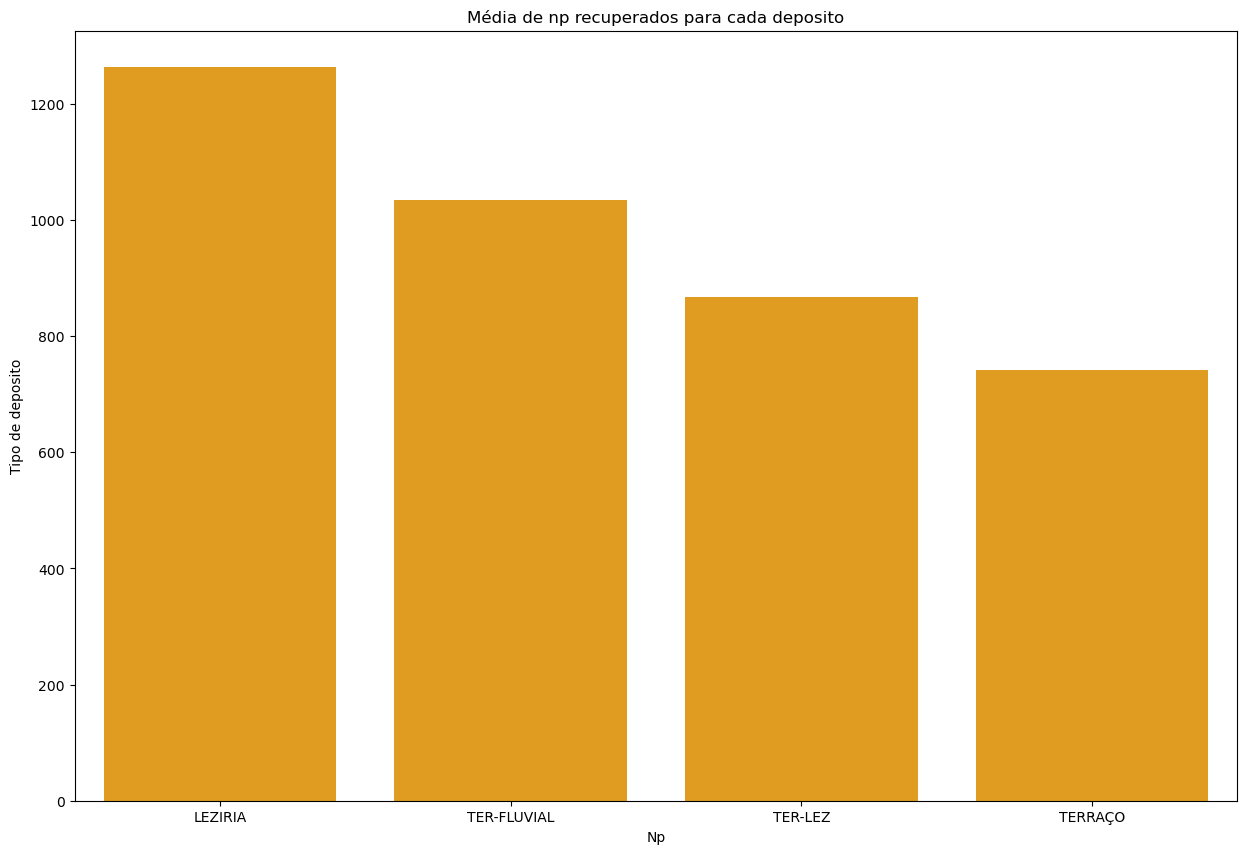

In [58]:
plt.figure(figsize=(15, 10))
srn.barplot(x='Deposito', y='Np', color='orange', data=df_np_S_mean)

plt.title('Média de np recuperados para cada deposito')
plt.xlabel('Np')
plt.ylabel('Tipo de deposito')

plt.show()

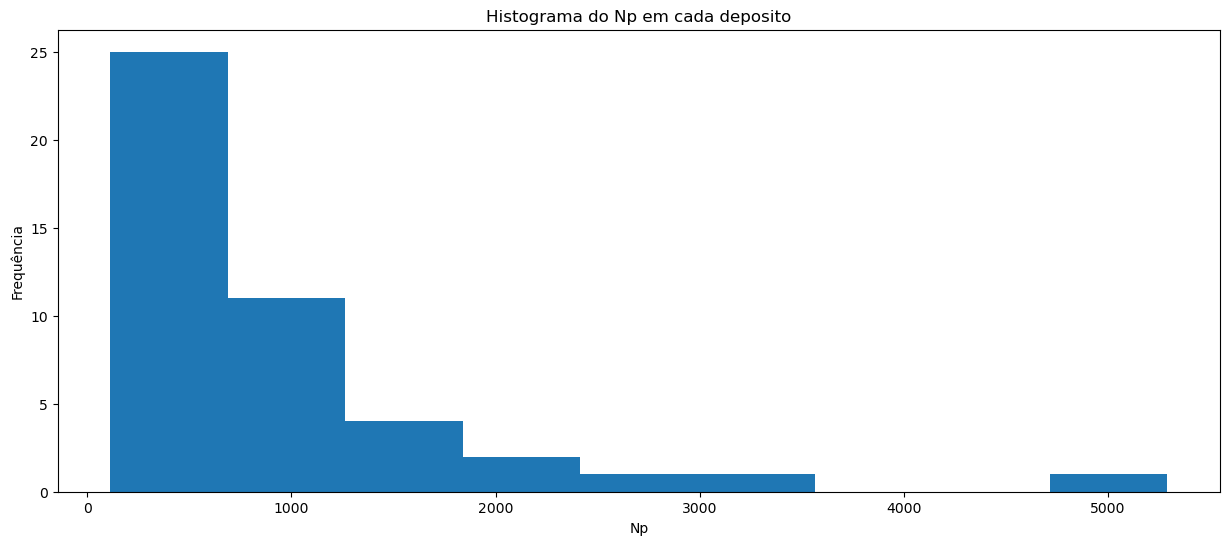

In [59]:
df['Np'].plot(kind='hist', bins=9, figsize=(15, 6))

plt.title('Histograma do Np em cada deposito')
plt.xlabel('Np')
plt.ylabel('Frequência')

plt.show()

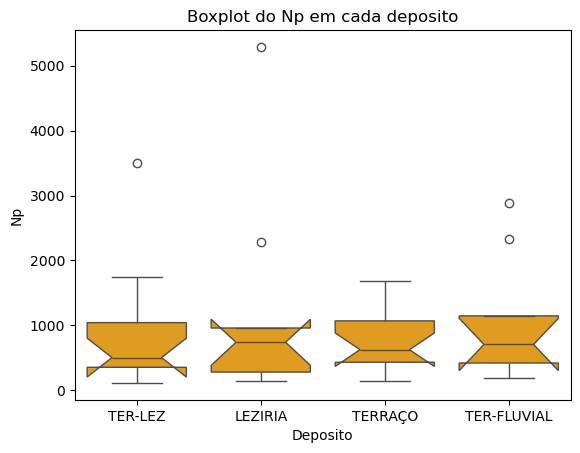

In [60]:
# Boxplot para as colunas 'Deposito' e 'Volume'. 
df['Deposito'].unique()

srn.boxplot(x='Deposito',
            y='Np', 
            data=df, 
            orient='v', 
            color='orange',
            notch=True).set_title('Boxplot do Np em cada deposito')

plt.show()

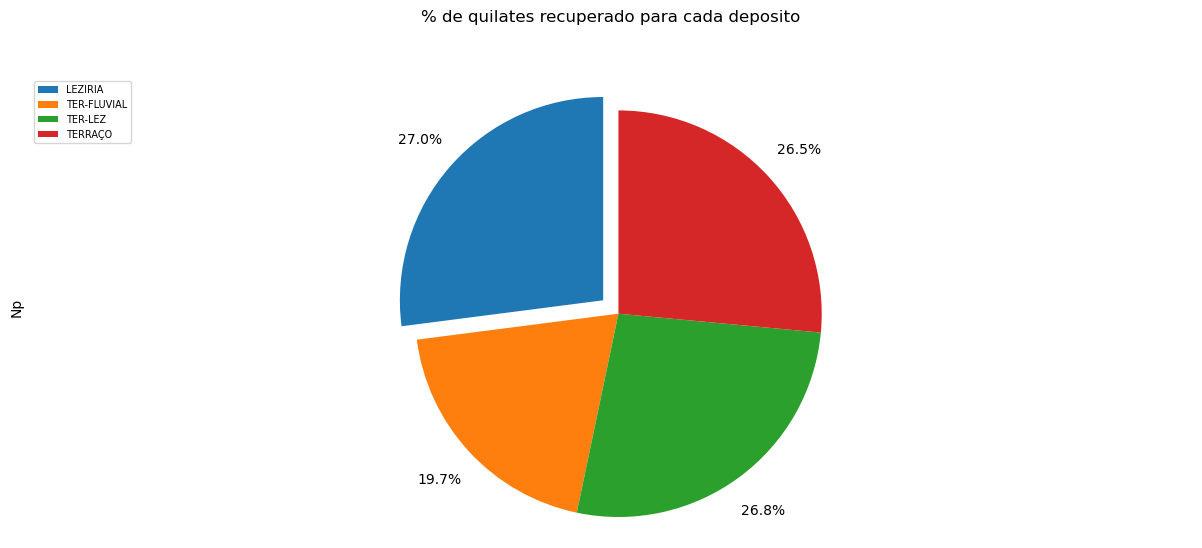

In [61]:
color_list = ['gold', 'yellowgreen', 'blue', 'lightskyblue']

explode_list = [0.1, 0, 0, 0] 

df_np_S['Np'].plot(kind='pie', 
                            figsize=(15, 6),
                            autopct='%1.1f%%',     
                            startangle=90,         
                            #shadow=True,           
                            labels=None,           
                            pctdistance=1.20,       
                            explode=explode_list    
                            )


# scale the title up by 12% to match pctdistance 
plt.title('% de quilates recuperado para cada deposito', y=1.10)

# Sets the pie chart to look like a circle.
plt.axis('equal') 

# Add legend
plt.legend(labels=df_np_S.index, loc='upper left', fontsize=7)

plt.show()

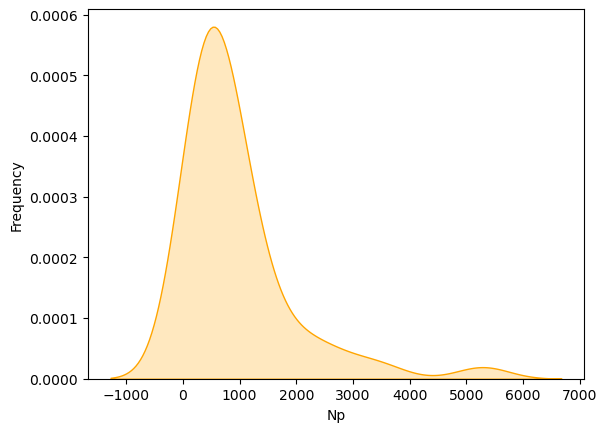

In [62]:
srn.kdeplot(df.Np, shade=True, color='orange')
plt.ylabel('Frequency')
plt.xlabel('Np')

plt.show()

---

* ### **Teor**

In [63]:
df_teor_mean = df.groupby(["Deposito"])['Teor'].mean().reset_index().round(2)
df_teor_mean.set_index('Deposito', inplace=True)

Total number of tiles is 400
LEZIRIA: 95
TER-FLUVIAL: 105
TER-LEZ: 105
TERRAÇO: 95


<Figure size 640x480 with 0 Axes>

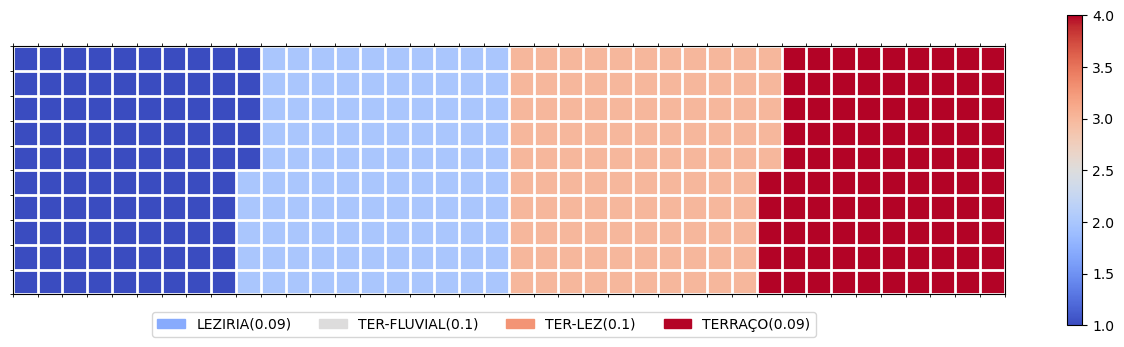

In [64]:
width = 40 # width of chart 
heigth = 10 # heigth chart 
dataframe = df_teor_mean 
column = 'Teor'

categories = df_teor_mean.index.values  # categories 
values = df_teor_mean['Teor']         # corresponding values of categories 

colormap = plt.cm.coolwarm       # Color map class 


create_waffle_chart(categories, dataframe, column, values, heigth, width, colormap)

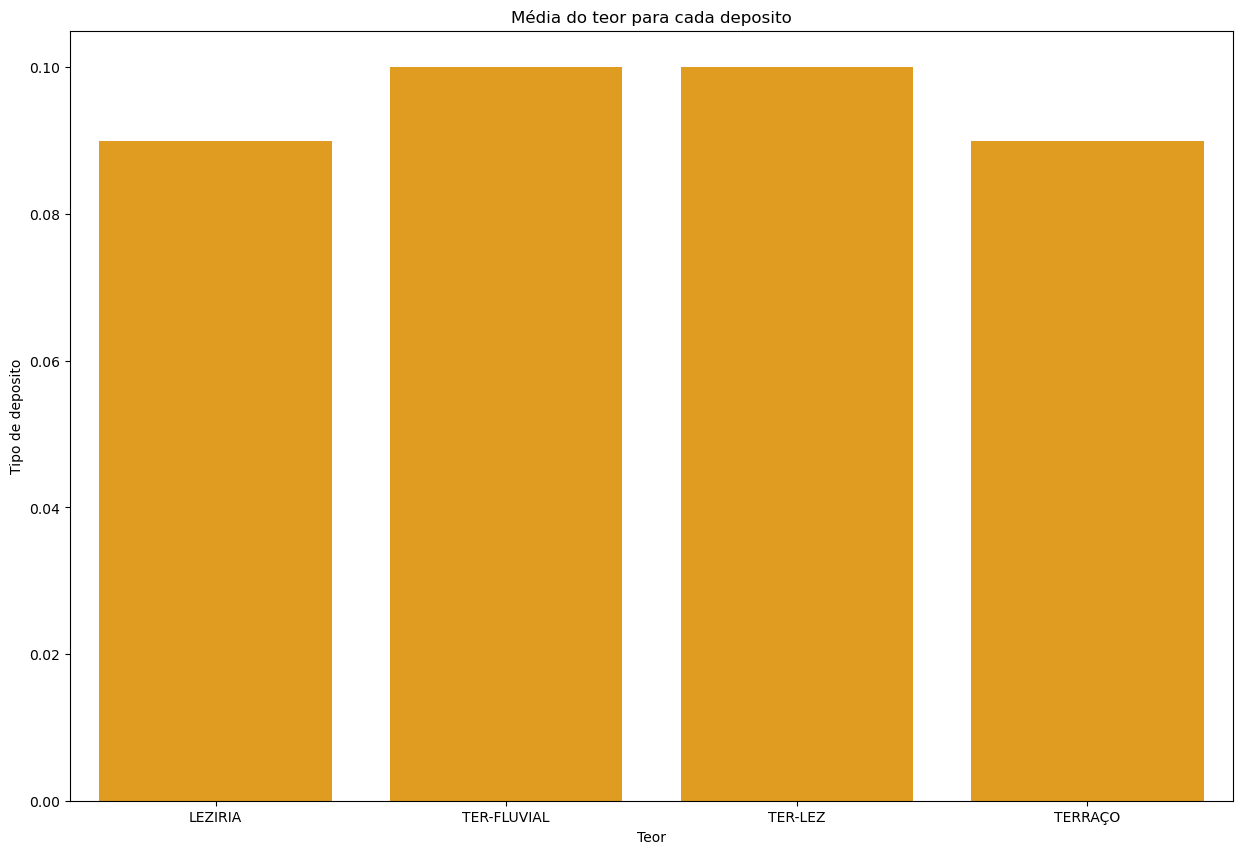

In [65]:
plt.figure(figsize=(15, 10))
srn.barplot(x='Deposito', y='Teor', color='orange', data=df_teor_mean)

plt.title('Média do teor para cada deposito')
plt.xlabel('Teor')
plt.ylabel('Tipo de deposito')

plt.show()

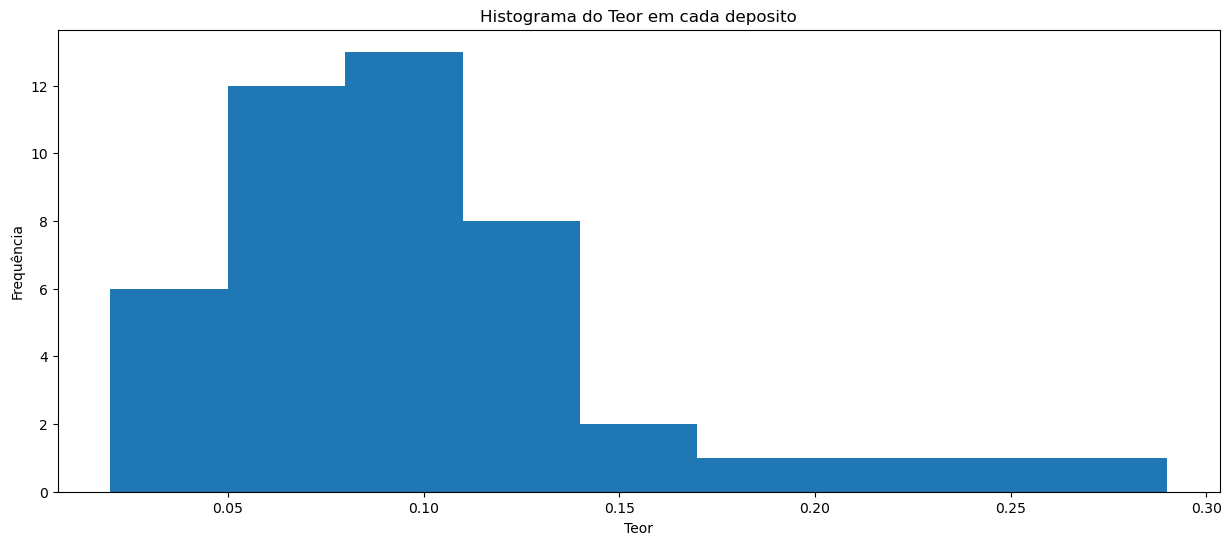

In [66]:
df['Teor'].plot(kind='hist', bins=9, figsize=(15, 6))

plt.title('Histograma do Teor em cada deposito')
plt.xlabel('Teor')
plt.ylabel('Frequência')

plt.show()

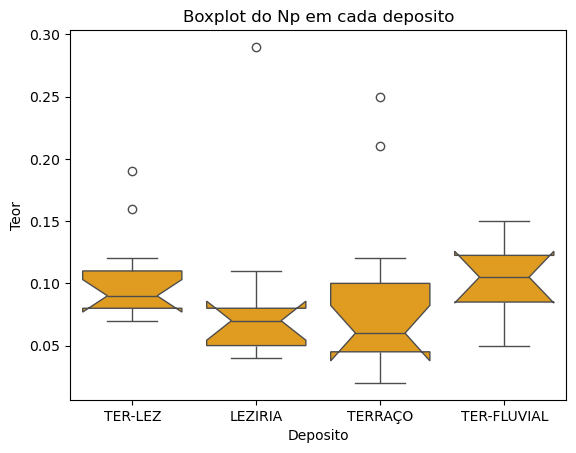

In [67]:
# Boxplot para as colunas 'Deposito' e 'Volume'. 
df['Deposito'].unique()

srn.boxplot(x='Deposito',
            y='Teor', 
            data=df, 
            orient='v', 
            color='orange',
            notch=True).set_title('Boxplot do Np em cada deposito')

plt.show()

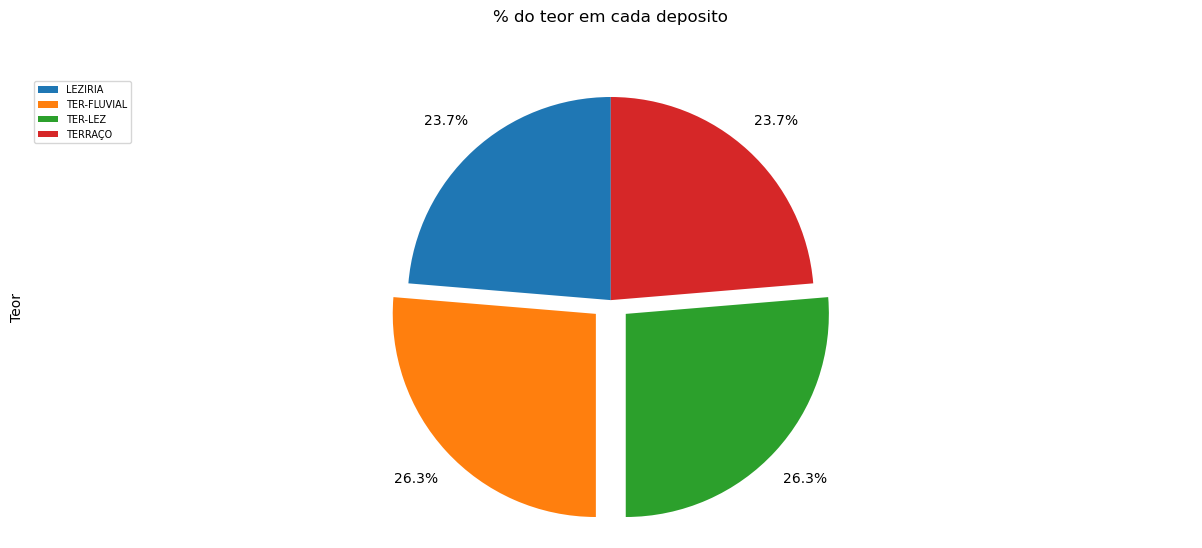

In [68]:
color_list = ['gold', 'yellowgreen', 'blue', 'lightskyblue']

explode_list = [0, 0.1, 0.1, 0] 

df_teor_mean['Teor'].plot(kind='pie', 
                            figsize=(15, 6),
                            autopct='%1.1f%%',     
                            startangle=90,         
                            #shadow=True,           
                            labels=None,           
                            pctdistance=1.20,       
                            explode=explode_list    
                            )


# scale the title up by 12% to match pctdistance 
plt.title('% do teor em cada deposito', y=1.10)

# Sets the pie chart to look like a circle.
plt.axis('equal') 

# Add legend
plt.legend(labels=df_teor_mean.index, loc='upper left', fontsize=7)

plt.show()

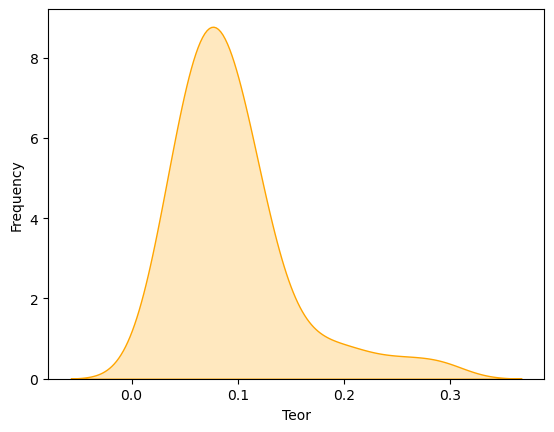

In [69]:
srn.kdeplot(df.Teor, shade=True, color='orange')
plt.ylabel('Frequency')
plt.xlabel('Teor')

plt.show()

---

* ### **Tp**

In [70]:
df_tp_mean = df.groupby(["Deposito"])['Tp'].mean().reset_index().round(2)
df_tp_mean.set_index('Deposito', inplace=True)

Total number of tiles is 400
LEZIRIA: 82
TER-FLUVIAL: 111
TER-LEZ: 107
TERRAÇO: 99


<Figure size 640x480 with 0 Axes>

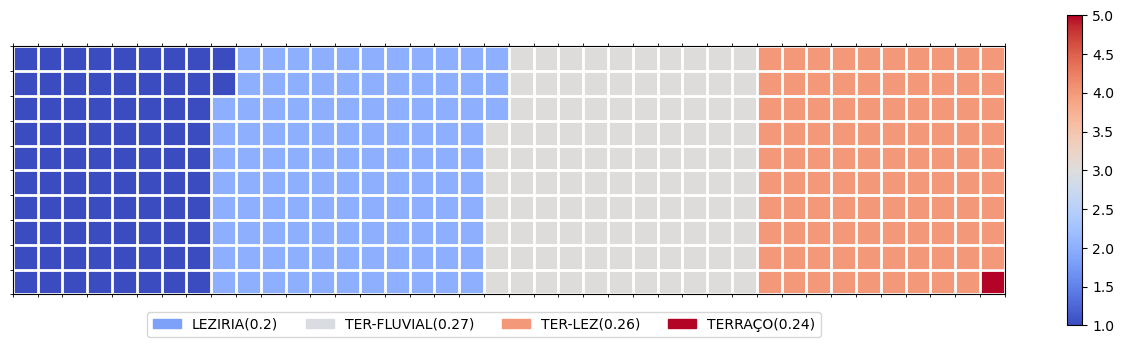

In [71]:
width = 40 # width of chart 
heigth = 10 # heigth chart 
dataframe = df_tp_mean 
column = 'Tp'

categories = df_tp_mean.index.values  # categories 
values = df_tp_mean['Tp']         # corresponding values of categories 

colormap = plt.cm.coolwarm       # Color map class 


create_waffle_chart(categories, dataframe, column, values, heigth, width, colormap)

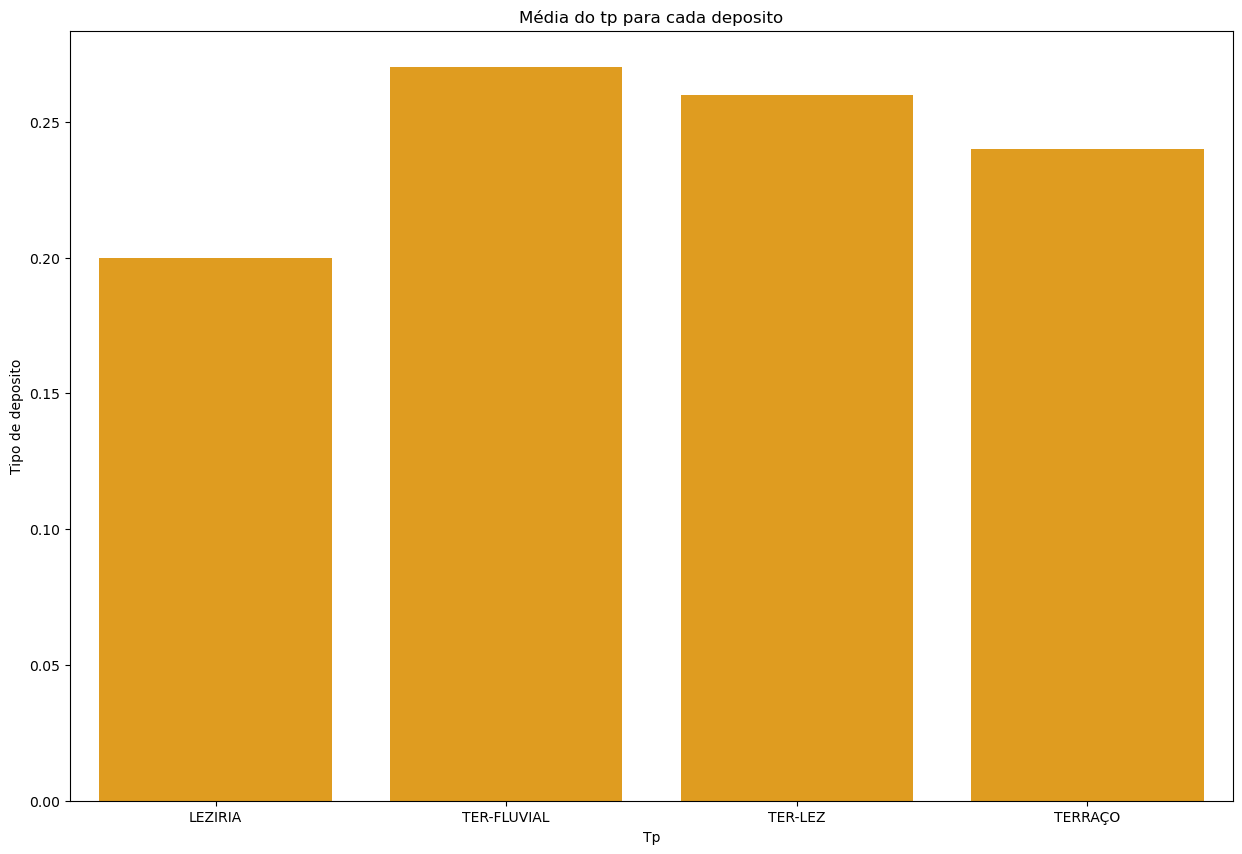

In [72]:
plt.figure(figsize=(15, 10))
srn.barplot(x='Deposito', y='Tp', color='orange', data=df_tp_mean)

plt.title('Média do tp para cada deposito')
plt.xlabel('Tp')
plt.ylabel('Tipo de deposito')

plt.show()

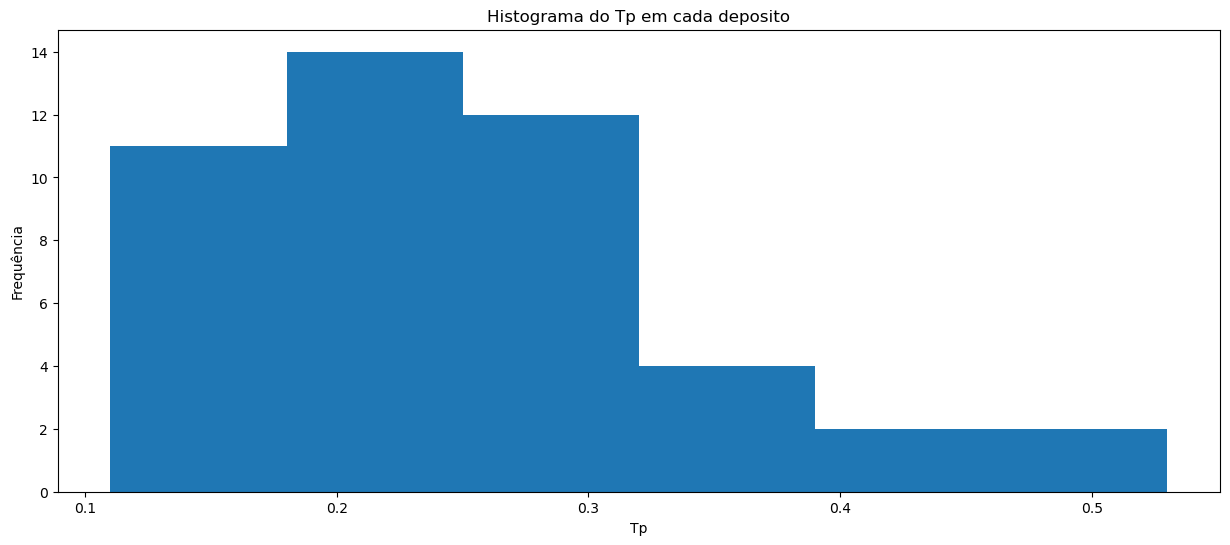

In [73]:
df['Tp'].plot(kind='hist', bins=6, figsize=(15, 6))

plt.title('Histograma do Tp em cada deposito')
plt.xlabel('Tp')
plt.ylabel('Frequência')

plt.show()

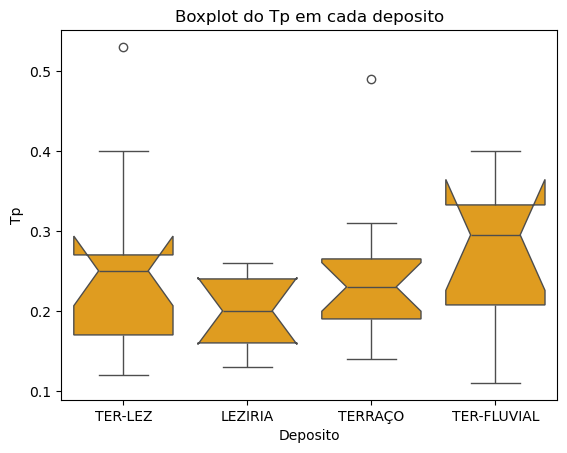

In [74]:
# Boxplot para as colunas 'Deposito' e 'Volume'. 
df['Deposito'].unique()

srn.boxplot(x='Deposito',
            y='Tp', 
            data=df, 
            orient='v', 
            color='orange',
            notch=True).set_title('Boxplot do Tp em cada deposito')

plt.show()

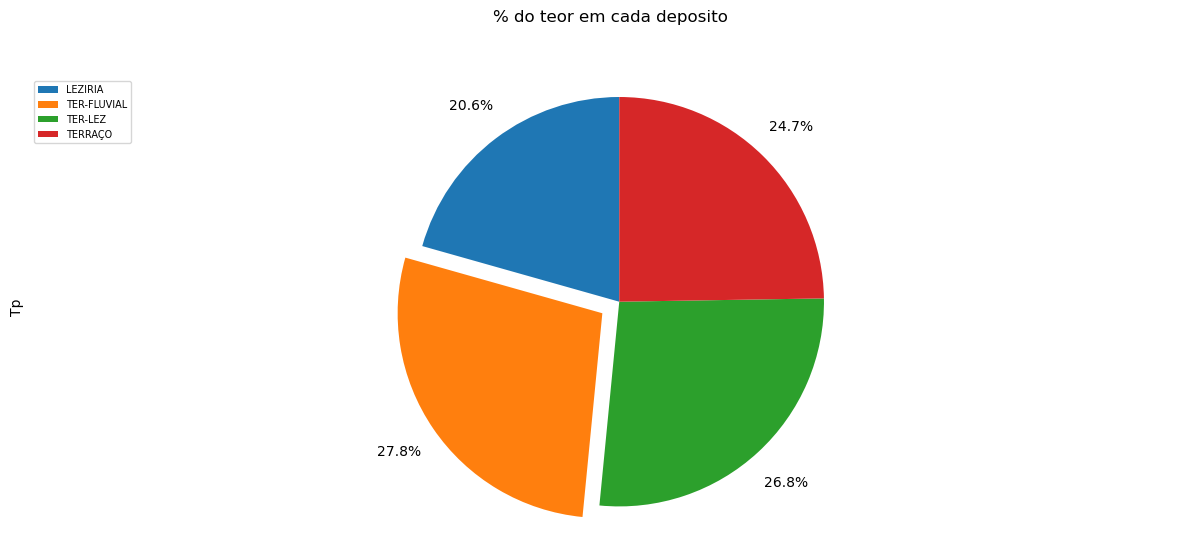

In [75]:
color_list = ['gold', 'yellowgreen', 'blue', 'lightskyblue']

explode_list = [0, 0.1, 0, 0] 

df_tp_mean['Tp'].plot(kind='pie', 
                            figsize=(15, 6),
                            autopct='%1.1f%%',     
                            startangle=90,         
                            #shadow=True,           
                            labels=None,           
                            pctdistance=1.20,       
                            explode=explode_list    
                            )


# scale the title up by 12% to match pctdistance 
plt.title('% do teor em cada deposito', y=1.10)

# Sets the pie chart to look like a circle.
plt.axis('equal') 

# Add legend
plt.legend(labels=df_tp_mean.index, loc='upper left', fontsize=7)

plt.show()

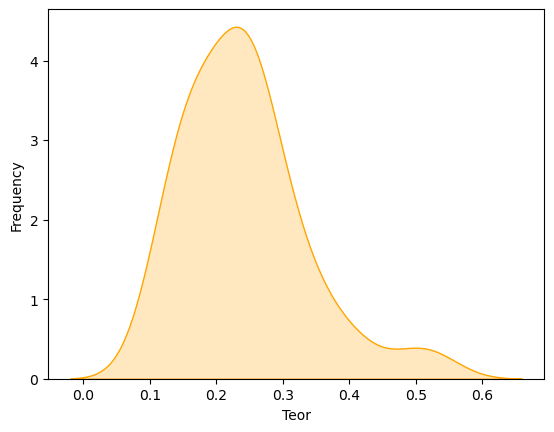

In [76]:
srn.kdeplot(df.Tp, shade=True, color='orange')
plt.ylabel('Frequency')
plt.xlabel('Teor')

plt.show()

## **Conclusão 2**:

* O Depósito com o volume de minério mais tradado foi o depósito de terraço com 36% do total volume de minério processado. 

* O Depósito com maior recuperação de quilates foi o depósito de terraço com 29% do total dos quilates recuperados. 

    * Obs: Não obstante a isso em média o depósito de lezíria teve a maior média de quilates recuperados com mais de 200 quilates em média por X volume de minério tratado.

* Depósito com maior número de pedras recuperados foi o depósito de lezíria com 27% do total de pedras recuperadas. 

* Depósitos de terraço e transição foram os depósitos com maior média de teor recuperado representando cada 26.3% da média total do teor recuperado. 

* O Depósito de Transição foi o depósito com a melhor média de tamanho de pedra recuperado, representando 27% da média total de tamanho de pedras recuperado. 

Nota-se que de todos os depositos o que menos se destacou foi o depósito de Terraço-fluvial, possivel antigo paneo canal.

Isto pode levar-nos a algumas supostas conclusões para esse deposito como: 

    * 1. Alta dispersão no material no deposito. 
    * 2. Discontinuidade na deposição dos sedimentos. 
    * 3. Fraca energia de transporte de sedimentos. 

---

* #### **Relação entre as variáveis**

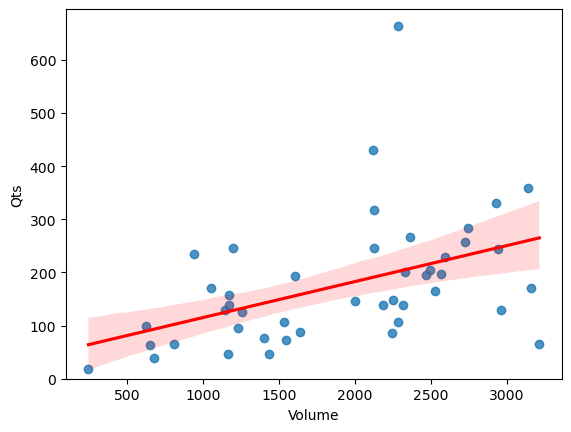

In [77]:
srn.regplot(x='Volume', y='Qts', data=df, line_kws={'color': 'red'})
plt.ylim(0,)
plt.show()

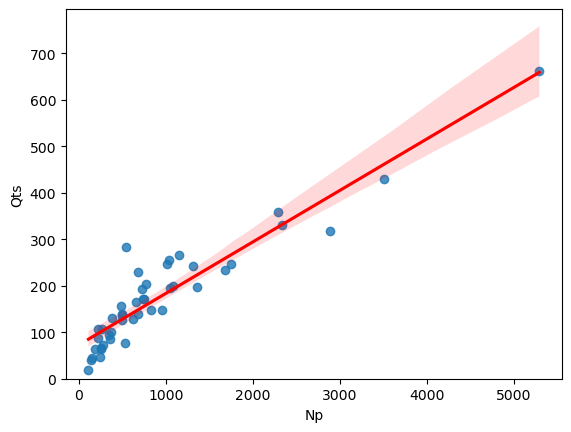

In [78]:
srn.regplot(x='Np', y='Qts', data=df, line_kws={'color': 'red'})
plt.ylim(0,)
plt.show()

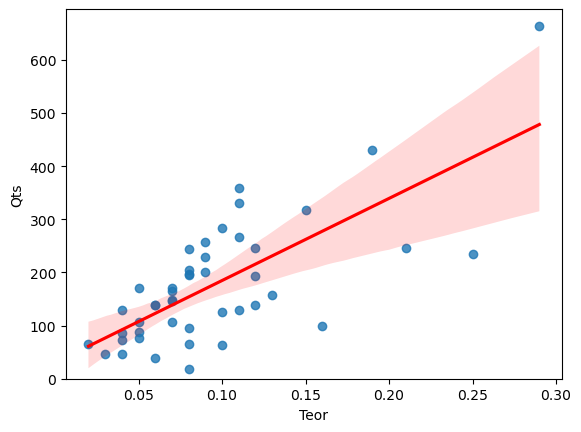

In [79]:
srn.regplot(x='Teor', y='Qts', data=df, line_kws={'color': 'red'})
plt.ylim(0,)
plt.show()

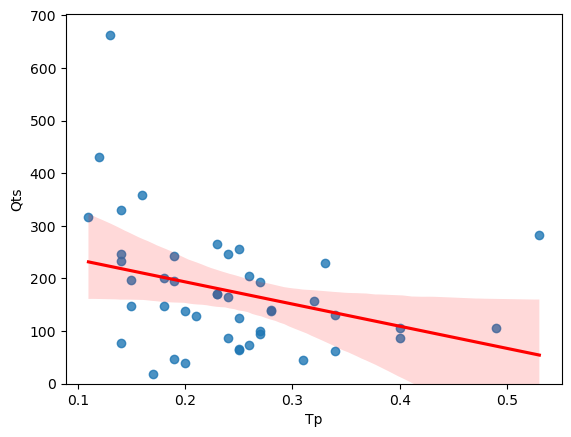

In [80]:
srn.regplot(x='Tp', y='Qts', data=df, line_kws={'color': 'red'})
plt.ylim(0,)
plt.show()

---

#### **Quarta Tarefa**

* Model Development 

    * Simple Linear Regression 

    * Multiple Linear Regression 

    * Polynomial Regression 

    * Ridge Regression

In [81]:
lm = LinearRegression()
lm

LinearRegression()

* **Simple Linear Regression**

Podemos ajustar o modelo de regressão linear usando a variável que ''apresenta'' menos correlação com a variável que queremos prever. Nesse caso os quilates.

## **LEZIRIA DEPOSITO**

In [239]:
LEZIRIA = df.loc[df['Deposito'] == 'LEZIRIA']

* **Volume**

In [83]:
x_lez1 = LEZIRIA[['Volume']]
Y_lez = LEZIRIA['Qts']

In [84]:
lr_lez1 = lm.fit(x_lez1,Y_lez)
lr_lez1

LinearRegression()

In [85]:
# Produce a prediction 
Yhat_lr_lez1 = lr_lez1.predict(x_lez1)
Yhat_lr_lez1[0:5].round(2)

array([ 46.42, 101.34, 144.11, 254.63, 325.53])

In [86]:
# Final Estimaded Linear for the model above
qts_lr_lez1 = lr_lez1.intercept_ + lr_lez1.coef_ * LEZIRIA['Volume']
qts_lr_lez1[0:5].round(2)

1      46.42
6     101.34
10    144.11
22    254.63
26    325.53
Name: Volume, dtype: float64

In [87]:
# Calculate de R^2
R_squared_lr1 = r2_score(Y_lez, lr_lez1.predict(x_lez1))
print('R_squared is:', R_squared_lr1)

R_squared is: 0.2368213939364504


Podemos usar o mesmo passo feito acima para ajustar o modelo regression linear para prever os ``quilates`` usando o ``Volume`` e depois calcular o erro quadrático.  

---

* **Teor**

In [88]:
x_lez2 = LEZIRIA[['Teor']]

In [89]:
# Ajustar o modelo com uma nova variável 
lr_lez2 = lm.fit(x_lez2, Y_lez)
lr_lez2

LinearRegression()

In [90]:
# Produce a prediction 
Yhat_lr_lez2 = lr_lez2.predict(x_lez2)
Yhat_lr_lez2[0:5].round(2)

array([135.4 ,  87.24,  87.24, 159.48, 111.32])

In [91]:
# Final Estimaded Linear for the second model (lr2)
qts_lr_lez2 = lr_lez2.intercept_ + lr_lez2.coef_ * LEZIRIA['Teor']
qts_lr_lez2[0:5].round(2)

1     135.40
6      87.24
10     87.24
22    159.48
26    111.32
Name: Teor, dtype: float64

In [92]:
# Calculate de R^2
R_squared_lr2 = lr_lez2.score(x_lez2, Y_lez)
print('R_squared is:', R_squared_lr2 )

R_squared is: 0.9148621448957358


---

**Conclusão**:

O valor do erro quadrático para o modelo de regressão linear com a variável ``Volume`` é relativamente menor que em relação ao erro quadrático para a modelo usando a variável ``Teor``. Isso significa que o segundo modelo é o melhor para prever os quilates a serem recuperados. 


---

* **Multiple Linear Regression**:

Podemos ajustar o modelo de regressão linear para prever o quantidade de quilates a recuperar usando todas as demais variáveis:

* ``Volume``, ``Teor``.

In [93]:
Z_lez1 = LEZIRIA[['Volume', 'Teor']]

In [94]:
lr_lez3 = lm.fit(Z_lez1, Y_lez)
lr_lez3

LinearRegression()

In [95]:
Yhat_lr_lez3 = lr_lez3.predict(Z_lez1)
Yhat_lr_lez3[0:5].round(2)

array([ 46.58,  33.6 ,  58.45, 190.04, 186.35])

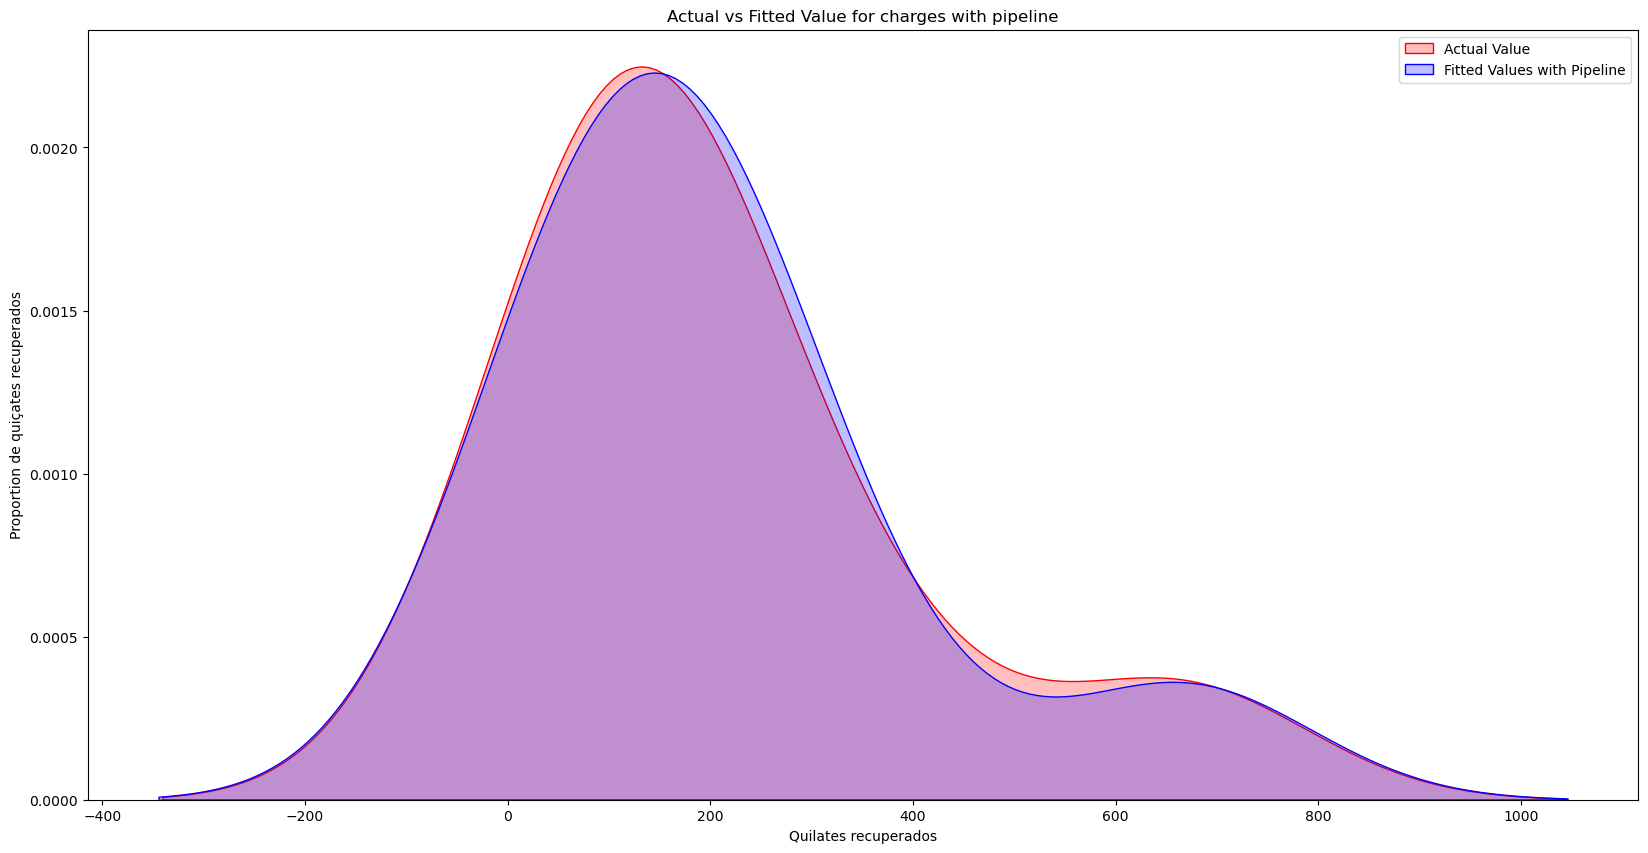

In [96]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(Y_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_lr_lez3, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [97]:
R_squared_lr3 = lr_lez3.score(Z_lez1, Y_lez)
print('R_squared is:', R_squared_lr3)

R_squared is: 0.9906743285901429


---

**Conclusion**:

* Podemos observar que o valor do erro quadrático para o modelo de regressão linear múltipla é maior em relação ao erro quadrádito do modelo de regressão linear simples. 

Continuaremos a procurar qual é o melhor ajuste. Para isso usaremos Regressão Polinomial e a Regressão de Ridge.  

---

**Regressão Polinomial**

* Agora iremos crear um objeto de pipeline para prever os quilates, ajustar o objeto usando as variáveis na lista de variáveis criada e calcular o erro quadrático.

* Para fazer isso iremos usar a função variável polinomial para transformar as variáveis dentro da funcão variável polinomal com um grão igual a 2.

In [98]:
# Create a polynomial feature obbject of degree 2
pr_lez1 = PolynomialFeatures(degree=2)
print(pr_lez1)

PolynomialFeatures()


In [99]:
Z_lez1.isnull().sum()

Volume    0
Teor      0
dtype: int64

In [100]:
# Fit and transform the data into a polynomial 
Z_pr_lez1 = pr_lez1.fit_transform(Z_lez1)
print(Z_lez1.shape)
print(Z_pr_lez1.shape)

(9, 2)
(9, 6)


* Criar a pipeline, pela criando de uma lista de tuples incluindo o nome do modelo e isso corresponde a construção do input.

In [101]:
input_lez = [('Scale', StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
input_lez

[('Scale', StandardScaler()),
 ('Polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

Inserir a lista como um argumento do construtor pipeline: 

In [102]:
pipe_lez = Pipeline(input_lez)
pipe_lez 

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

* **Normalizando os dados por que regressão polinomial é sensível as escalas das variáveis.**

In [103]:
feature_lez1 = Z_lez1.astype(float)
pipe_lez.fit(feature_lez1, Y_lez)

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [104]:
Yhat_pipe_lez = pipe_lez.predict(feature_lez1)
Yhat_pipe_lez[0:5]

array([ 39.46040026,  52.06728139,  66.96607013, 180.69024147,
       168.25478548])

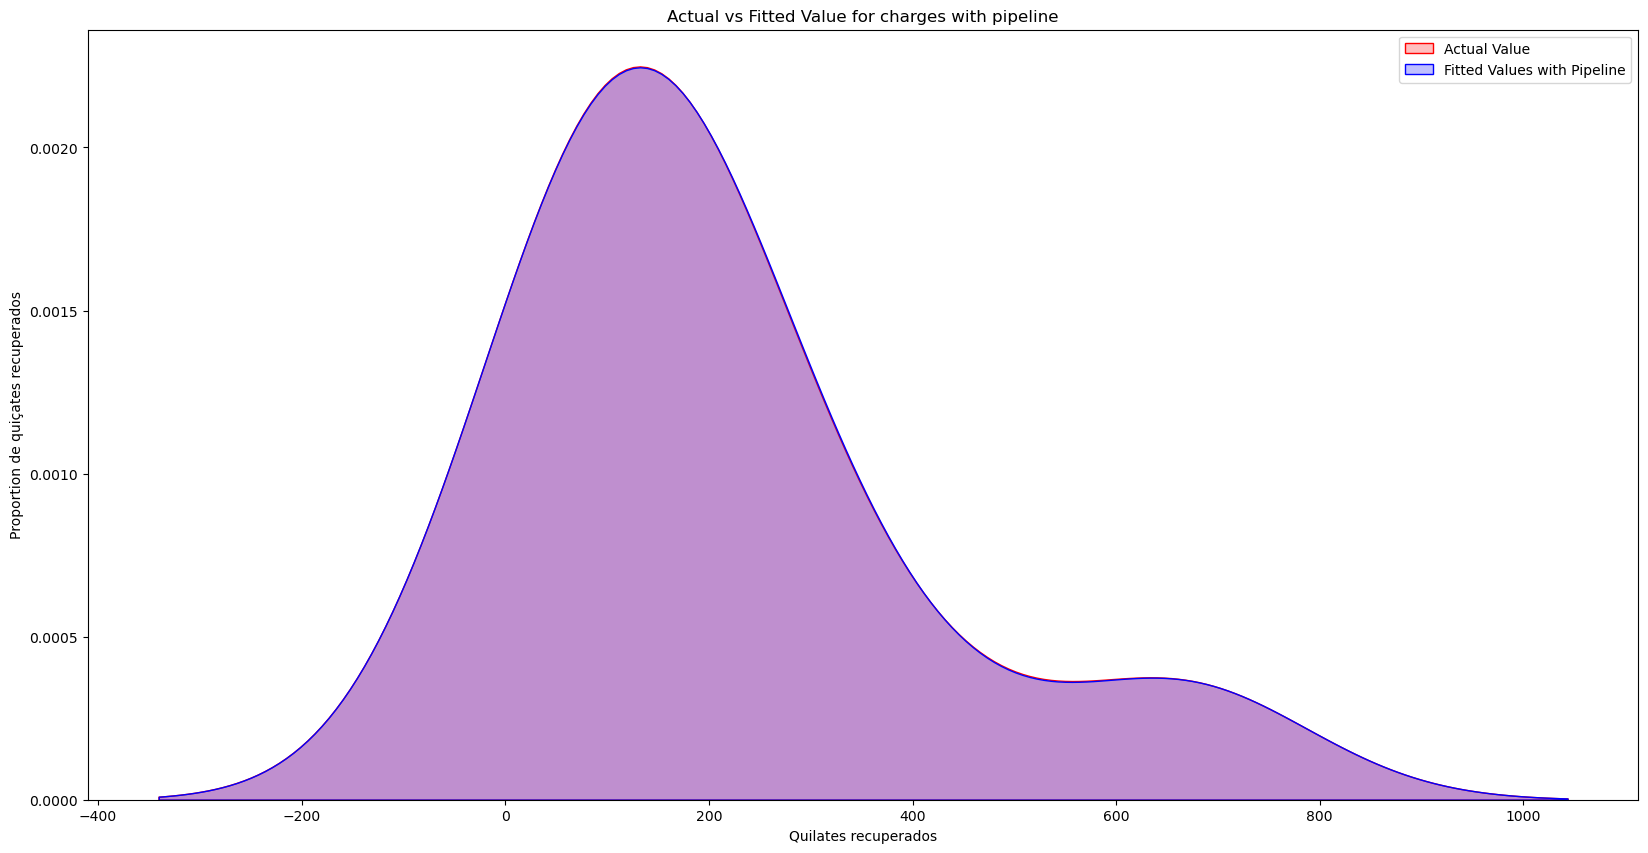

In [105]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(Y_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_pipe_lez, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [106]:
R_squared_pipe_lez = r2_score(Y_lez, pipe_lez.predict(feature_lez1))
print('R_squared:', R_squared_pipe_lez)

R_squared: 0.9988093462798296


---
**Conclusion**:

* O valor do erro quadrático do modelo polinomial é maior em relação ao modelo de regressão linear simples e múltipla. Isso significa que o modelo de regressão polinomial é melhor em prever a recuperação de quilates. 
---

#### **Quinta Tarefa**

* Avaliação e Ajustamento do Modelo 

In [107]:
features_lez2 =  ['Volume', 'Teor']
Z_lez2 = LEZIRIA[features_lez2]

* Agora iremos separar os dados em subconjuntos de treinamento e teste. 

* Assumiremos que 15% dos dados irão ser reservados for teste e 75% para treinamento.

In [108]:
x_train_lez, x_test_lez, y_train_lez, y_test_lez = train_test_split(Z_lez2, Y_lez, test_size=0.15, random_state=1)

print('Number of training samples:', x_train_lez.shape[0])
print('Number of test samples:', x_test_lez.shape[0])

Number of training samples: 7
Number of test samples: 2


* Criar o object de Regressão Ridge.
* Usando os dados do treinamento, adiciona o parametro de regularização para 0.1

* Porque estou usando a Regressão Ridge ?

    * A Regressão Ridge é o tipo de regressão linear que pode ser usado 
    quando a multicolinariedade está presente nos dados. Isto é algo bom para prever super ajustes, porque introduz uma quantía pequena de bias no modelo. 

In [109]:
RidgeModelo_lez = Ridge(alpha=0.1)
RidgeModelo_lez.fit(x_train_lez, y_train_lez)

Ridge(alpha=0.1)

In [110]:
R_squared_Ridge = r2_score(y_test_lez, RidgeModelo_lez.predict(x_test_lez))
print('The R-squared value is:', R_squared_Ridge)

The R-squared value is: -0.31214783059245965


* Criar as variáveis polinomias e transformar sub-conjuntos de treinamento e de teste. 

* Performando a tranformação do 2º grão polinomial nos dados.

In [111]:
pr_lez2 = PolynomialFeatures(degree=2)
x_train_pr_lez2 = pr_lez2.fit_transform(x_train_lez)
x_test_pr_lez2 = pr_lez2.fit_transform(x_test_lez)
pr_lez2 

PolynomialFeatures()

In [112]:
print(x_train_pr_lez2.shape)
print(x_test_pr_lez2.shape)

(7, 6)
(2, 6)


* Ajustando o RidgeModelo criado em cima com o PolynomialFeatures (pr2)

In [113]:
RidgeModelo_lez.fit(x_train_pr_lez2, y_train_lez)

Ridge(alpha=0.1)

Nós usaremos o método ``predict`` para prever os quilates recuperados nas dados de treinamentos e nos dados de test. 

* **Treinamento**

In [114]:
Yhat_Ridge_Polly_lez = RidgeModelo_lez.predict(x_train_pr_lez2)
Yhat_Ridge_Polly_lez[0:5]

array([139.23386558, 356.6372051 ,  44.80258778,  41.59328475,
       167.75020999])

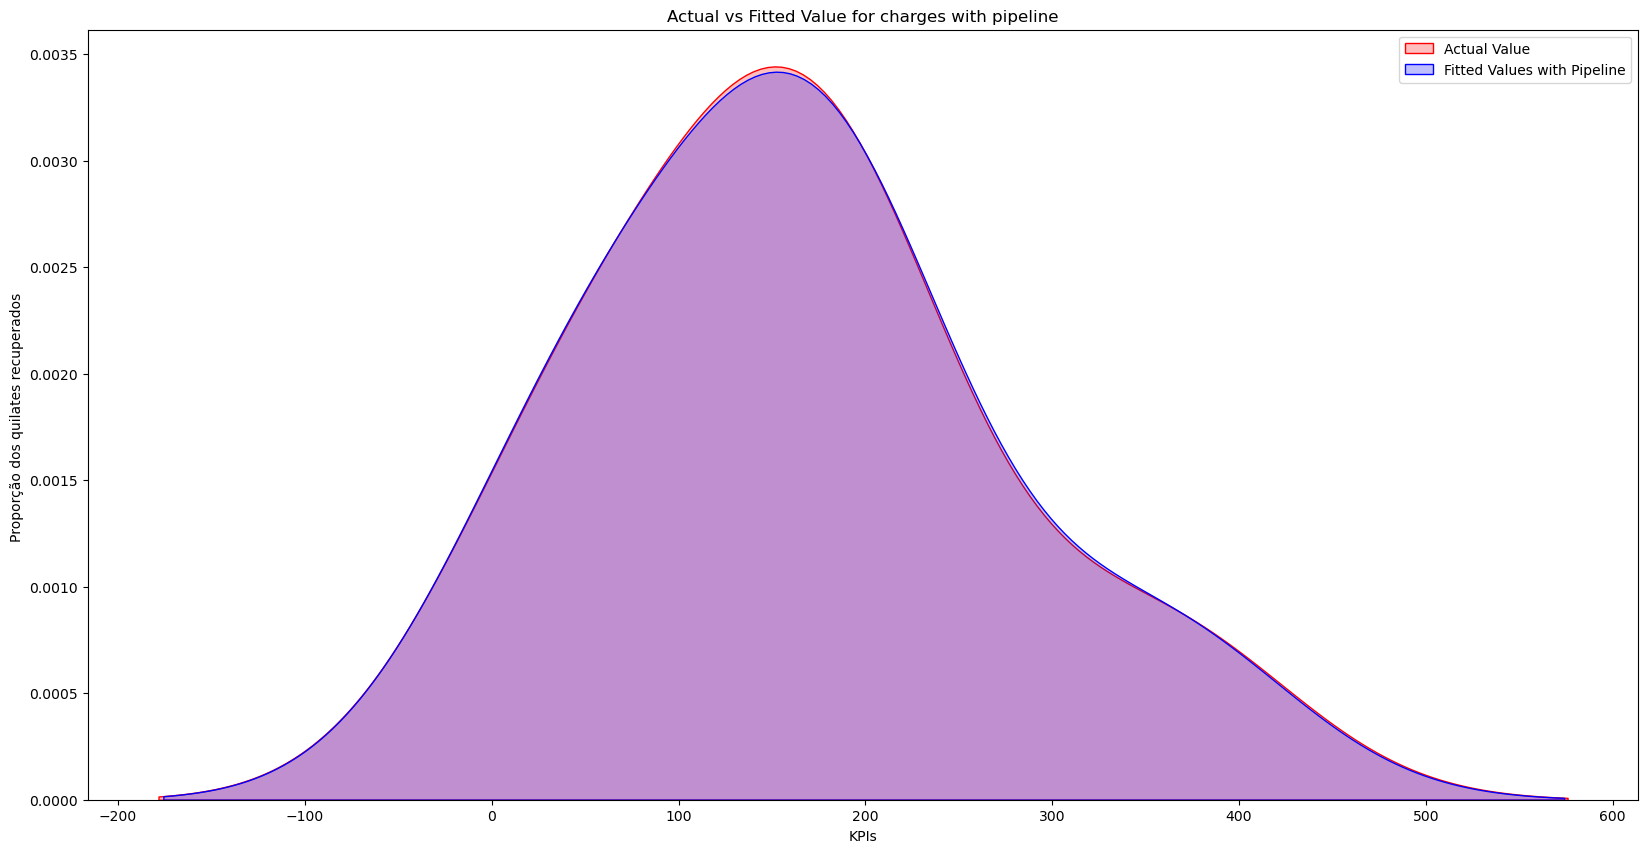

In [115]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_train_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_lez, color='b', label='Fitted Values with Pipeline', fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('KPIs')
plt.ylabel('Proporção dos quilates recuperados ')

plt.legend()

plt.show()

In [116]:
R_squared_Ridge_Polly = r2_score(y_train_lez, Yhat_Ridge_Polly_lez)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.9958580355564585


* **Teste**

In [117]:
Yhat_Ridge_Polly_lez_test = RidgeModelo_lez.predict(x_test_pr_lez2)
Yhat_Ridge_Polly_lez_test[0:5]

array([666.78123548,  59.4152653 ])

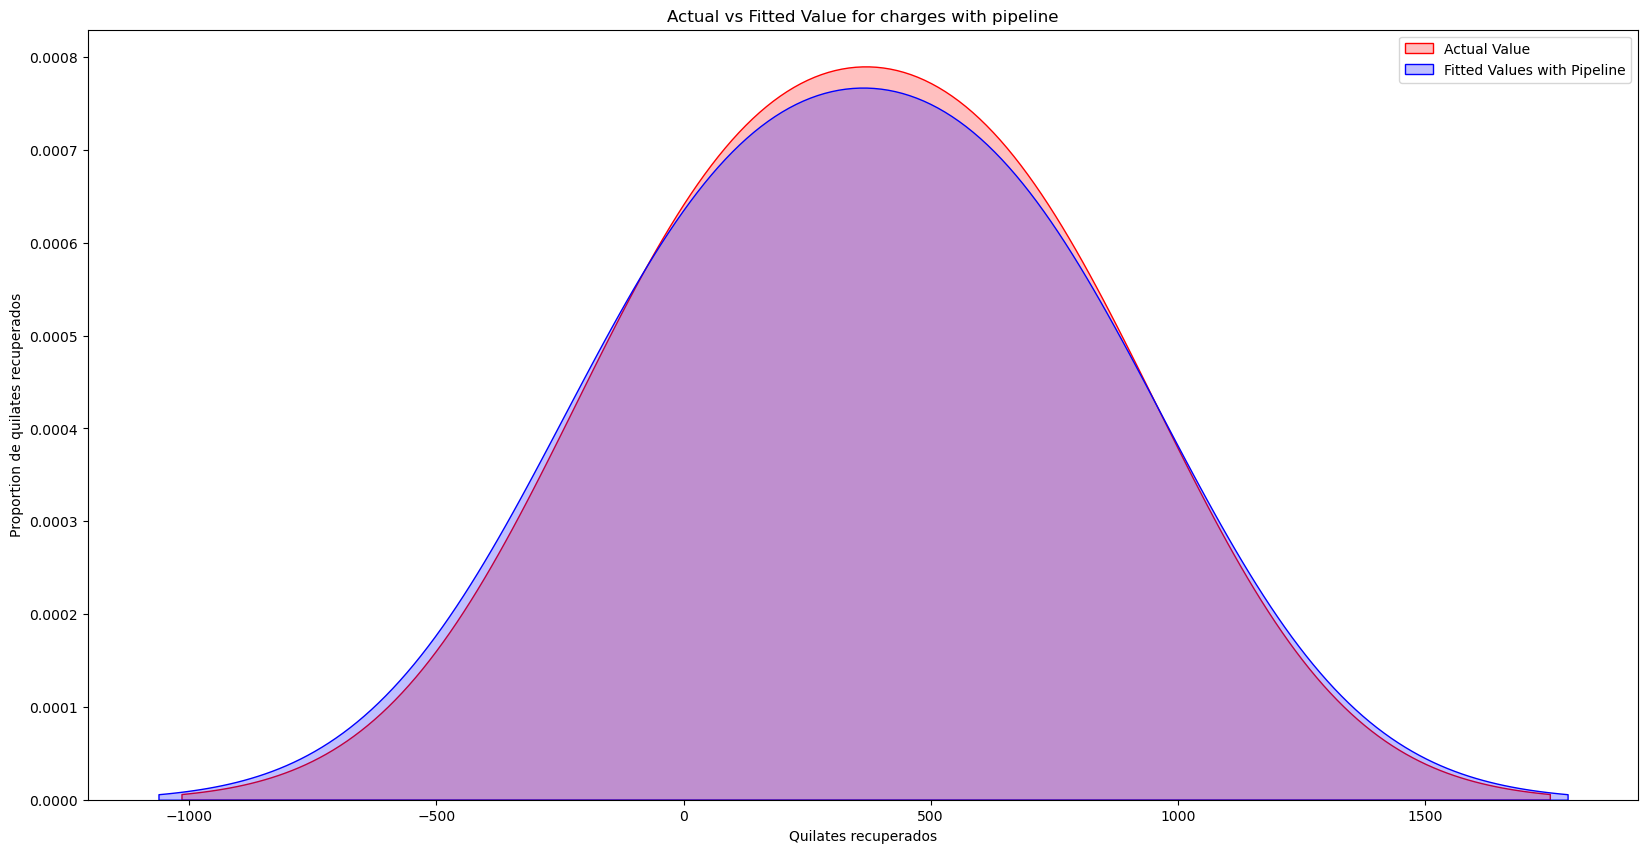

In [118]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(y_test_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_lez_test, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quilates recuperados')

plt.legend()        

plt.show()

In [119]:
R_squared_Ridge_Polly = r2_score(y_test_lez, Yhat_Ridge_Polly_lez_test)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.9987885438112296


* **Validação Cruzada**

* Podemos usar o method ``cross_val_score`` para otber a media do erro quadrático para dados de treino e de test.

In [120]:
Rcross_Polly = cross_val_score(RidgeModelo_lez, x_train_pr_lez2, y_train_lez, cv = 3)
print('The mean of the folds are:', Rcross_Polly.mean())

The mean of the folds are: 0.32433261548746944


## **TER-LEZ DEPOSITO**

In [121]:
TER_LEZ = df.loc[df['Deposito'] == 'TER-LEZ']

---
* **Regressão Linear**
---

* **Volume**

In [122]:
x_ter_lez1 = TER_LEZ[['Volume']]
Y_ter_lez = TER_LEZ['Qts']

In [123]:
lr_ter_lez1 = lm.fit(x_ter_lez1, Y_ter_lez)
lr_ter_lez1

LinearRegression()

In [124]:
# Produce a prediction 
Yhat_lr_ter_lez1 = lr_ter_lez1.predict(x_ter_lez1)
Yhat_lr_ter_lez1[0:5].round(2)

array([ 28.76,  85.51, 158.37, 127.78,  67.  ])

In [125]:
# Final Estimaded Linear for the model above
Yhat_lr_ter_lez1 = lr_ter_lez1.intercept_ + lr_ter_lez1.coef_ * TER_LEZ['Volume']
Yhat_lr_ter_lez1[0:5].round(2)

0      28.76
7      85.51
9     158.37
11    127.78
13     67.00
Name: Volume, dtype: float64

In [126]:
# Calculate de R^2
R_squared_lr1 = r2_score(Y_ter_lez, lr_ter_lez1.predict(x_ter_lez1))
print('R_squared is:', R_squared_lr1)

R_squared is: 0.571712853386504


* **Teor**

In [127]:
x_ter_lez2 = TER_LEZ[['Teor']]

In [128]:
# Ajustar o modelo com uma nova variável 
lr_ter_lez2 = lm.fit(x_ter_lez2, Y_ter_lez)
lr_ter_lez2

LinearRegression()

In [129]:
# Produce a prediction 
Yhat_lr_ter_lez2 = lr_ter_lez2.predict(x_ter_lez2)
Yhat_lr_ter_lez2[0:5].round(2)

array([129.28, 129.28, 111.31, 129.28, 273.06])

In [130]:
# Final Estimaded Linear for the model above
qts_lr_ter_lez2 = lr_ter_lez2.intercept_ + lr_ter_lez2.coef_ * TER_LEZ['Teor']
qts_lr_ter_lez2[0:5].round(2)

0     129.28
7     129.28
9     111.31
11    129.28
13    273.06
Name: Teor, dtype: float64

In [131]:
# Calculate de R^2
R_squared_lr2 = lr_ter_lez2.score(x_ter_lez2, Y_ter_lez)
print('R_squared is:', R_squared_lr2 )

R_squared is: 0.3434640523062198


---
* **Multiple Linear Regression**:

In [132]:
Z_ter_lez1 = TER_LEZ[['Volume', 'Teor']]

In [133]:
lr_ter_lez3 = lm.fit(Z_ter_lez1, Y_ter_lez)
lr_ter_lez3

LinearRegression()

In [134]:
# Produce a prediction 
Yhat_lr_ter_lez3 = lr_ter_lez3.predict(Z_ter_lez1)
Yhat_lr_ter_lez3[0:5].round(2)

array([-13.5 ,  43.84,  99.18,  86.55, 171.41])

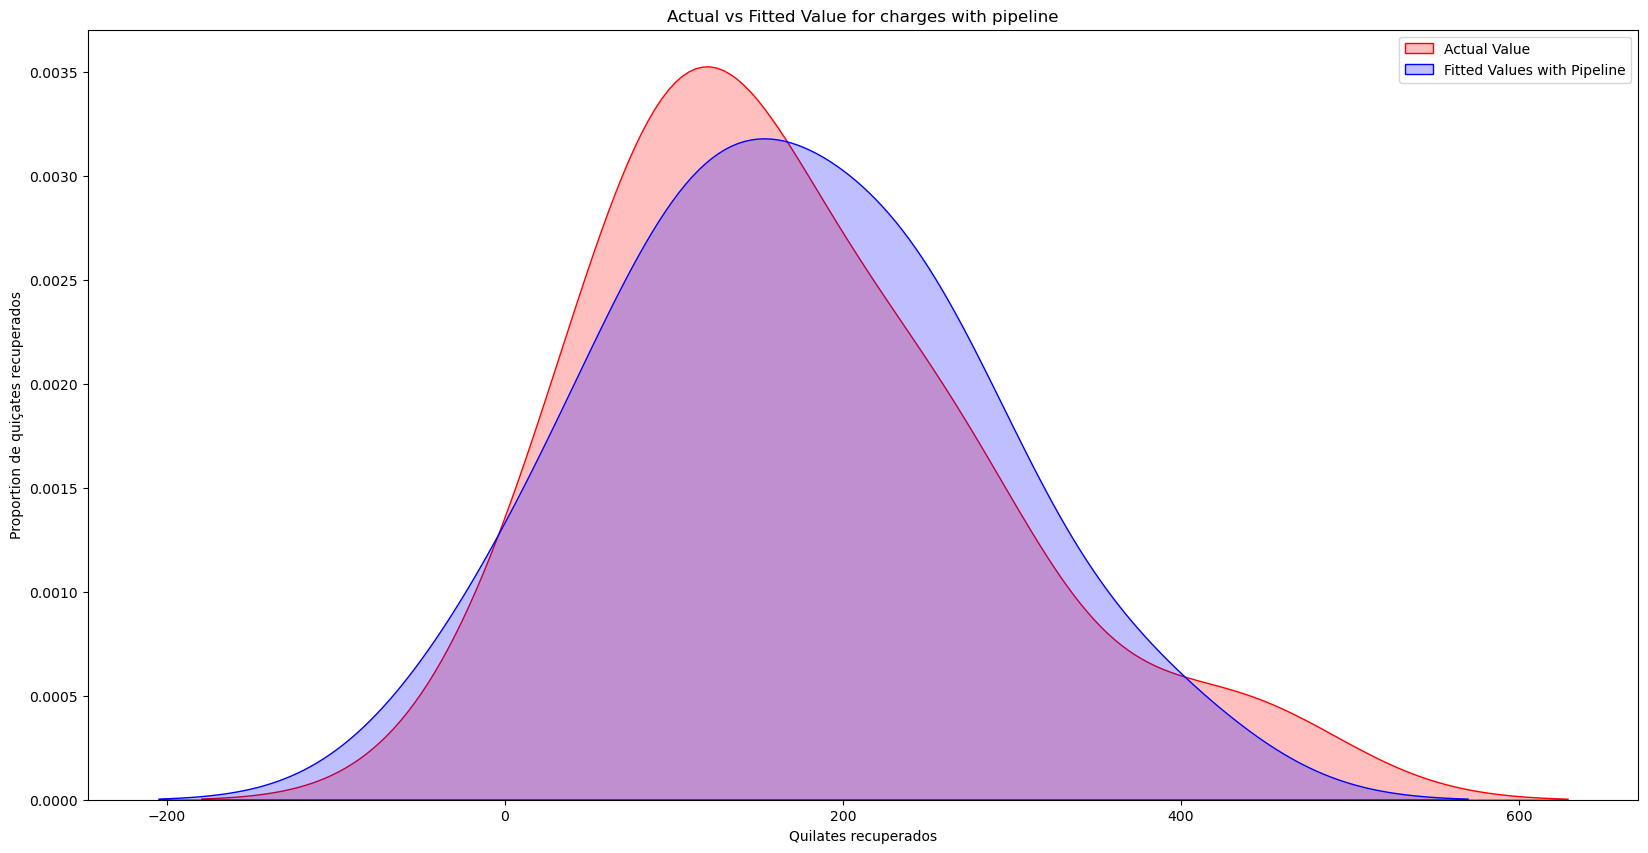

In [135]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(Y_ter_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_lr_ter_lez3, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [136]:
R_squared_lr3 = lr_ter_lez3.score(Z_ter_lez1 , Y_ter_lez)
print('R_squared is:', R_squared_lr3)

R_squared is: 0.9271313124708324


Continuaremos a procurar qual é o melhor ajuste. Para isso usaremos Regressão Polinomial e a Regressão de Ridge. 

---
**Regressão Polinomial**

In [137]:
# Create a polynomial feature obbject of degree 2
pr_ter_lez1 = PolynomialFeatures(degree=2)
print(pr_ter_lez1)

PolynomialFeatures()


In [138]:
Z_ter_lez1.isnull().sum()

Volume    0
Teor      0
dtype: int64

In [139]:
# Fit and transform the data into a polynomial 
Z_pr_ter_lez1 = pr_ter_lez1.fit_transform(Z_ter_lez1)
print(Z_ter_lez1.shape)
print(Z_pr_ter_lez1.shape)

(13, 2)
(13, 6)


In [140]:
input_ter_lez = [('Scale', StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
input_ter_lez

[('Scale', StandardScaler()),
 ('Polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [141]:
pipe_ter_lez = Pipeline(input_ter_lez)
pipe_ter_lez 

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [142]:
feature_ter_lez1 = Z_ter_lez1.astype(float)
pipe_ter_lez.fit(feature_ter_lez1, Y_ter_lez)

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [143]:
Yhat_pipe_ter_lez = pipe_ter_lez.predict(feature_ter_lez1)
Yhat_pipe_ter_lez[0:5]

array([ 22.95802006,  63.24780355, 102.64006787,  94.81460569,
       100.48202909])

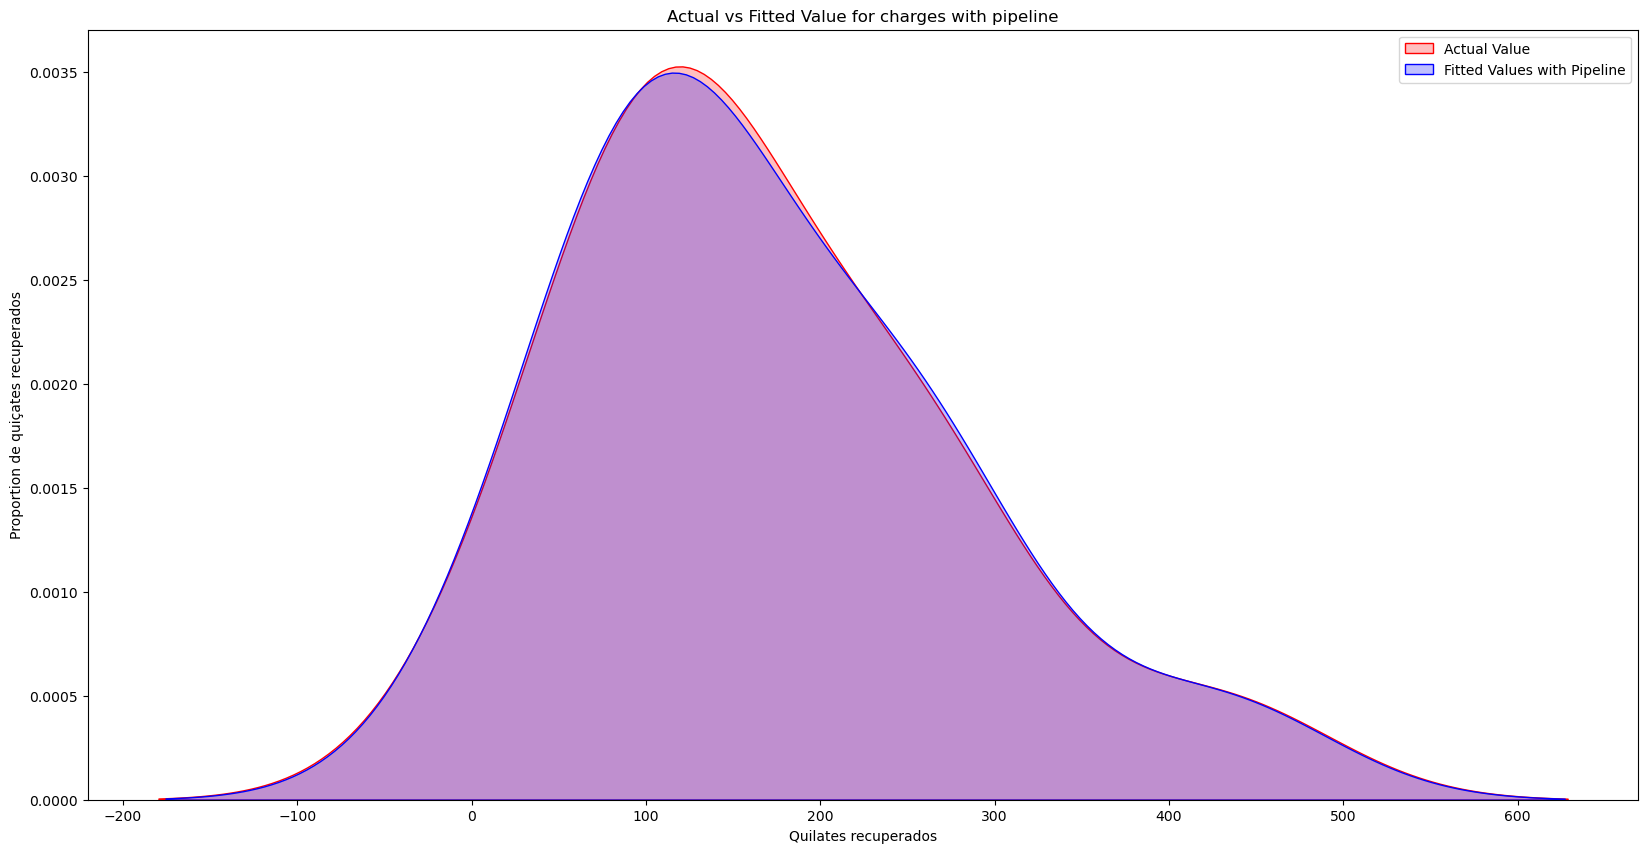

In [144]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(Y_ter_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_pipe_ter_lez, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [145]:
R_squared = r2_score(Y_ter_lez, pipe_ter_lez.predict(feature_ter_lez1))
print('R_squared:', R_squared)

R_squared: 0.9972367427865375


#### **Quinta Tarefa**

* Avaliação e Ajustamento do Modelo 

In [146]:
features_ter_lez2 =  ['Volume', 'Teor']
Z_ter_lez2 = TER_LEZ[features_ter_lez2]

In [147]:
x_train_ter_lez, x_test_ter_lez, y_train_ter_lez, y_test_ter_lez = train_test_split(Z_ter_lez2, Y_ter_lez, test_size=0.15, random_state=1)

print('Number of training samples:', x_train_ter_lez.shape[0])
print('Number of test samples:', x_test_ter_lez.shape[0])

Number of training samples: 11
Number of test samples: 2


In [148]:
RidgeModelo_ter_lez = Ridge(alpha=0.1)
RidgeModelo_ter_lez.fit(x_train_ter_lez, y_train_ter_lez)

Ridge(alpha=0.1)

In [149]:
R_squared_Ridge = r2_score(y_test_ter_lez, RidgeModelo_ter_lez.predict(x_test_ter_lez))
print('The R-squared value is:', R_squared_Ridge)

The R-squared value is: -61.462546273699914


In [150]:
pr_ter_lez2 = PolynomialFeatures(degree=2)
x_train_pr_ter_lez2 = pr_ter_lez2.fit_transform(x_train_ter_lez)
x_test_pr_ter_lez2 = pr_ter_lez2.fit_transform(x_test_ter_lez)
pr_ter_lez2

PolynomialFeatures()

In [151]:
print(x_train_pr_ter_lez2.shape)
print(x_test_pr_ter_lez2.shape)

(11, 6)
(2, 6)


In [152]:
RidgeModelo_ter_lez.fit(x_train_pr_ter_lez2, y_train_ter_lez)

Ridge(alpha=0.1)

* **Treinamento**

In [153]:
Yhat_Ridge_Polly_ter_lez = RidgeModelo_ter_lez.predict(x_train_pr_ter_lez2)
Yhat_Ridge_Polly_ter_lez[0:5]

array([103.95550169, 203.1478924 ,  60.34400638, 121.56777435,
        21.72806105])

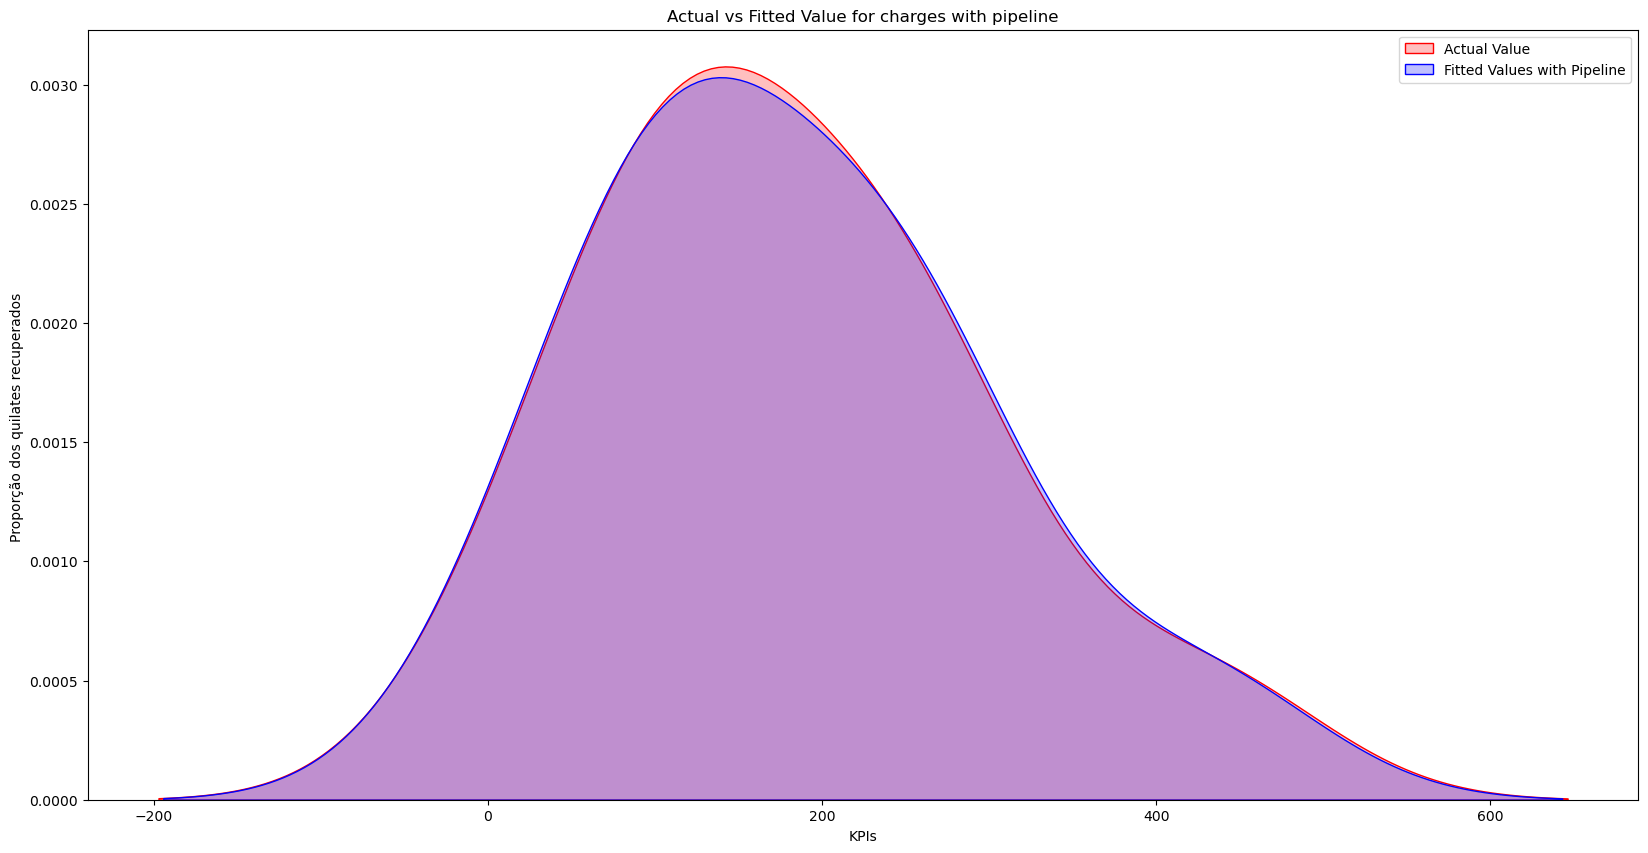

In [154]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_train_ter_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_ter_lez, color='b', label='Fitted Values with Pipeline', fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('KPIs')
plt.ylabel('Proporção dos quilates recuperados ')

plt.legend()

plt.show()

In [155]:
R_squared_Ridge_Polly = r2_score(y_train_ter_lez, Yhat_Ridge_Polly_ter_lez)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.997080673522627


* **Teste**

In [156]:
Yhat_Ridge_Polly_ter_lez_test = RidgeModelo_ter_lez.predict(x_test_pr_ter_lez2)
Yhat_Ridge_Polly_ter_lez_test[0:5]

array([97.7737106 , 91.39984308])

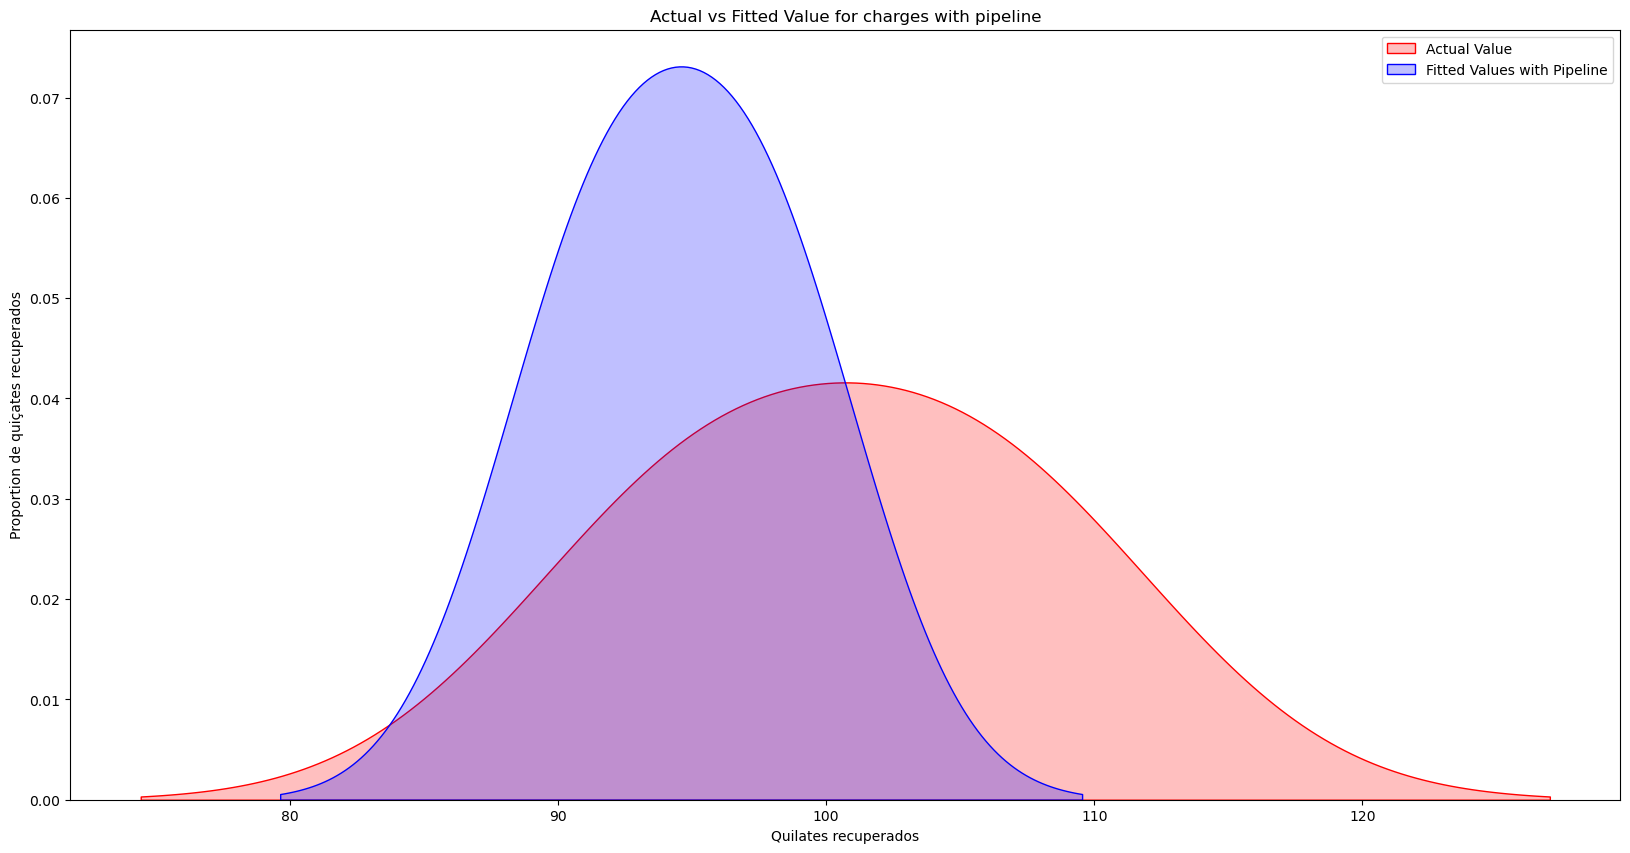

In [157]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_test_ter_lez, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_ter_lez_test, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [158]:
R_squared_Ridge_Polly = r2_score(y_test_ter_lez, Yhat_Ridge_Polly_ter_lez_test)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: -0.3812739336521651


* **Validação Cruzada**

In [159]:
Rcross_Polly = cross_val_score(RidgeModelo_ter_lez, x_train_pr_ter_lez2, y_train_ter_lez, cv = 3)
print('The mean of the folds are:', Rcross_Polly.mean())

The mean of the folds are: 0.9722505344319848


## **TERRAÇO DEPOSITO**

In [160]:
TER = df.loc[df['Deposito'] == 'TERRAÇO']

---
* **Regressão Linear**
---

* **Volume**

In [161]:
x_ter1 = TER[['Volume']]
Y_ter = TER['Qts']

In [162]:
lr_ter1 = lm.fit(x_ter1, Y_ter)
lr_ter1

LinearRegression()

In [163]:
# Produce a prediction 
Yhat_lr_ter1 = lr_ter1.predict(x_ter1)
Yhat_lr_ter1[0:5].round(2)

array([158.61, 152.81, 146.44, 153.06, 152.57])

In [164]:
# Final Estimaded Linear for the model above
Yhat_lr_ter1 = lr_ter1.intercept_ + lr_ter1.coef_ * TER['Volume']
Yhat_lr_ter1[0:5].round(2)

2     158.61
4     152.81
8     146.44
12    153.06
16    152.57
Name: Volume, dtype: float64

In [165]:
# Calculate de R^2
R_squared_lr1 = r2_score(Y_ter, lr_ter1.predict(x_ter1))
print('R_squared is:', R_squared_lr1)

R_squared is: 0.004460488784952643


* **Teor**

In [166]:
x_ter2 = TER[['Teor']]

In [167]:
# Ajustar o modelo com uma nova variável 
lr_ter2 = lm.fit(x_ter2, Y_ter)
lr_ter2

LinearRegression()

In [168]:
# Produce a prediction 
Yhat_lr_ter2 = lr_ter2.predict(x_ter2)
Yhat_lr_ter2[0:5].round(2)

array([109.44, 125.38, 101.48, 117.41, 133.35])

In [169]:
# Final Estimaded Linear for the model above
qts_lr_ter2 = lr_ter2.intercept_ + lr_ter2.coef_ * TER['Teor']
qts_lr_ter2[0:5].round(2)

2     109.44
4     125.38
8     101.48
12    117.41
16    133.35
Name: Teor, dtype: float64

In [170]:
# Calculate de R^2
R_squared_lr2 = lr_ter2.score(x_ter2, Y_ter)
print('R_squared is:', R_squared_lr2 )

R_squared is: 0.5186702465936546


**Conclusão**:

O valor do erro quadrático para o modelo de regressão linear com a variável ``Teor`` é relativamente maior que em relação ao erro quadrático para a modelo usando a variável ``Volume``. Isso significa que o segundo modelo é o melhor para prever os quilates a serem recuperados. 

---
* **Multiple Linear Regression**:

In [171]:
Z_ter1 = TER[['Volume', 'Teor']]

In [172]:
lr_ter3 = lm.fit(Z_ter1, Y_ter)
lr_ter3

LinearRegression()

In [173]:
# Produce a prediction 
Yhat_lr_ter3 = lr_ter_lez3.predict(Z_ter1)
Yhat_lr_ter3[0:5].round(2)

array([ 42.13, 121.53, 144.68, 106.87, 136.12])

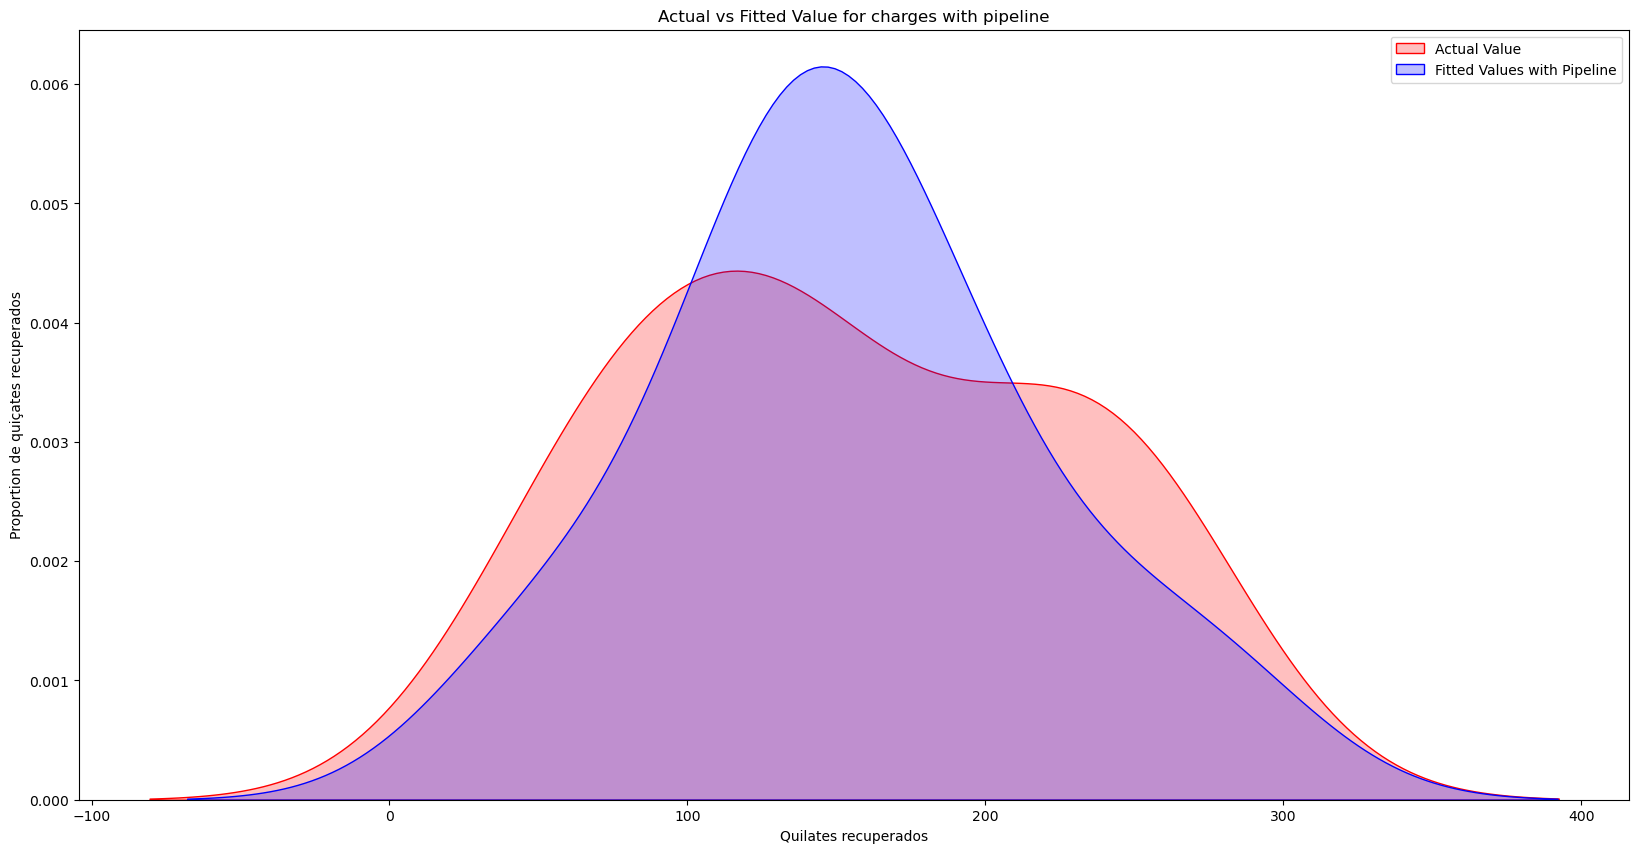

In [174]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(Y_ter, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_lr_ter3, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [175]:
R_squared_lr3 = lr_ter3.score(Z_ter1 , Y_ter)
print('R_squared is:', R_squared_lr3)

R_squared is: 0.760651589821771


---
**Regressão Polinomial**

In [176]:
# Create a polynomial feature obbject of degree 2
pr_ter1 = PolynomialFeatures(degree=2)
print(pr_ter1)

PolynomialFeatures()


In [177]:
Z_ter1.isnull().sum()

Volume    0
Teor      0
dtype: int64

In [178]:
# Fit and transform the data into a polynomial 
Z_pr_ter1 = pr_ter1.fit_transform(Z_ter1)
print(Z_ter1.shape)
print(Z_pr_ter1.shape)

(15, 2)
(15, 6)


In [179]:
input_ter = [('Scale', StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
input_ter

[('Scale', StandardScaler()),
 ('Polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [180]:
pipe_ter = Pipeline(input_ter)
pipe_ter 

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [181]:
feature_ter1 = Z_ter1.astype(float)
pipe_ter.fit(feature_ter1, Y_ter)

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [182]:
Yhat_pipe_ter = pipe_ter.predict(feature_ter1)
Yhat_pipe_ter[0:5]

array([ 48.39155523, 111.92544983,  69.4173084 ,  87.59335395,
       137.16776102])

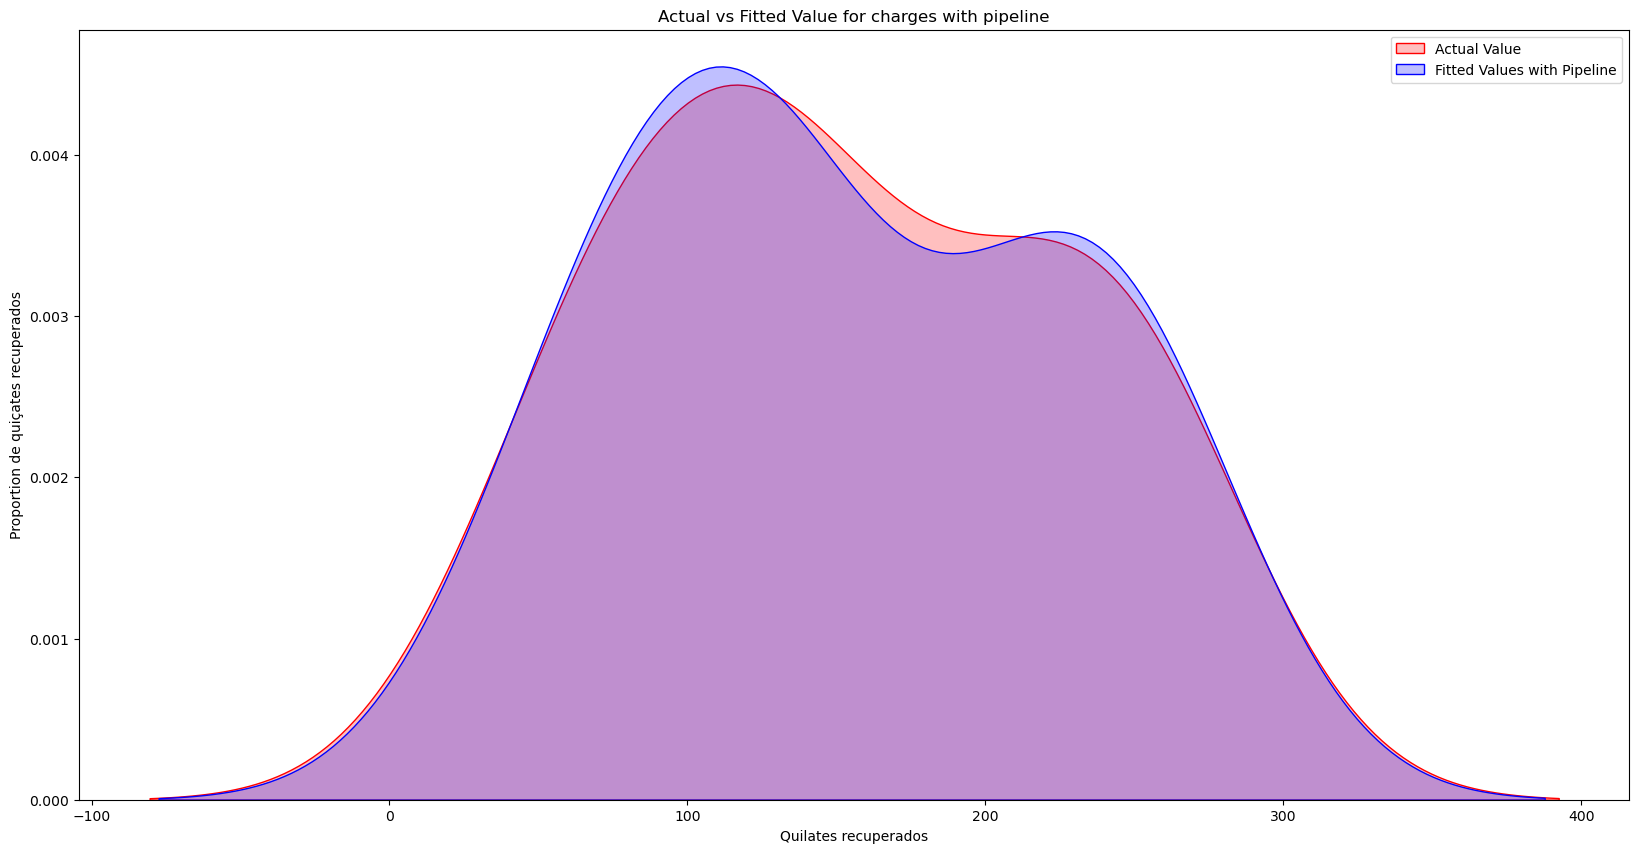

In [183]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(Y_ter, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_pipe_ter, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [184]:
R_squared = r2_score(Y_ter, pipe_ter.predict(feature_ter1))
print('R_squared:', R_squared)

R_squared: 0.9954218992148951


#### **Quinta Tarefa**

* Avaliação e Ajustamento do Modelo 

In [185]:
features_ter2 =  ['Volume', 'Teor']
Z_ter2 = TER[features_ter2]

In [186]:
x_train_ter, x_test_ter, y_train_ter, y_test_ter = train_test_split(Z_ter2, Y_ter, test_size=0.15, random_state=1)

print('Number of training samples:', x_train_ter.shape[0])
print('Number of test samples:', x_test_ter.shape[0])

Number of training samples: 12
Number of test samples: 3


In [187]:
RidgeModelo_ter = Ridge(alpha=0.1)
RidgeModelo_ter.fit(x_train_ter, y_train_ter)

Ridge(alpha=0.1)

In [188]:
R_squared_Ridge = r2_score(y_test_ter, RidgeModelo_ter.predict(x_test_ter))
print('The R-squared value is:', R_squared_Ridge)

The R-squared value is: -6.124595959242273


In [189]:
pr_ter2 = PolynomialFeatures(degree=2)
x_train_pr_ter2 = pr_ter2.fit_transform(x_train_ter)
x_test_pr_ter2 = pr_ter2.fit_transform(x_test_ter)
pr_ter2

PolynomialFeatures()

In [190]:
print(x_train_pr_ter2.shape)
print(x_test_pr_ter2.shape)

(12, 6)
(3, 6)


In [191]:
RidgeModelo_ter.fit(x_train_pr_ter2, y_train_ter)

Ridge(alpha=0.1)

* **Treinamento**

In [192]:
Yhat_Ridge_Polly_ter = RidgeModelo_ter.predict(x_train_pr_ter2)
Yhat_Ridge_Polly_ter[0:5]

array([ 67.76882421, 197.50041005, 138.72503419, 113.69256284,
       237.6000601 ])

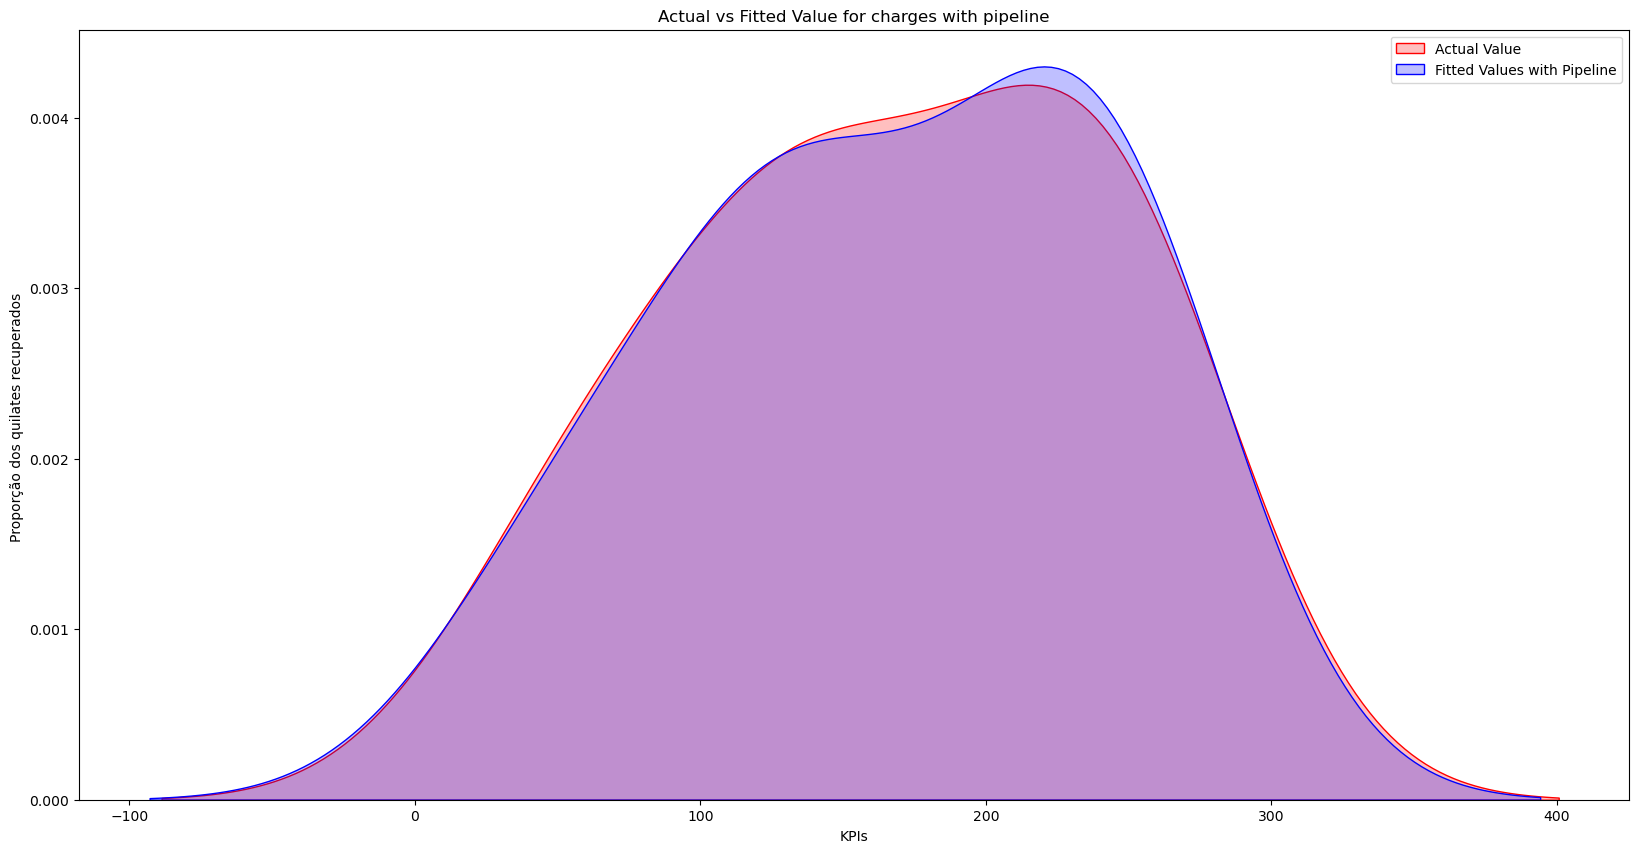

In [193]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_train_ter, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_ter, color='b', label='Fitted Values with Pipeline', fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('KPIs')
plt.ylabel('Proporção dos quilates recuperados ')

plt.legend()

plt.show()

In [194]:
R_squared_Ridge_Polly = r2_score(y_train_ter, Yhat_Ridge_Polly_ter)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.9945233481815032


* **Teste**

In [195]:
Yhat_Ridge_Polly_ter_test = RidgeModelo_ter.predict(x_test_pr_ter2)
Yhat_Ridge_Polly_ter_test[0:5]

array([ 89.3222646 , 120.72510193,  68.35849719])

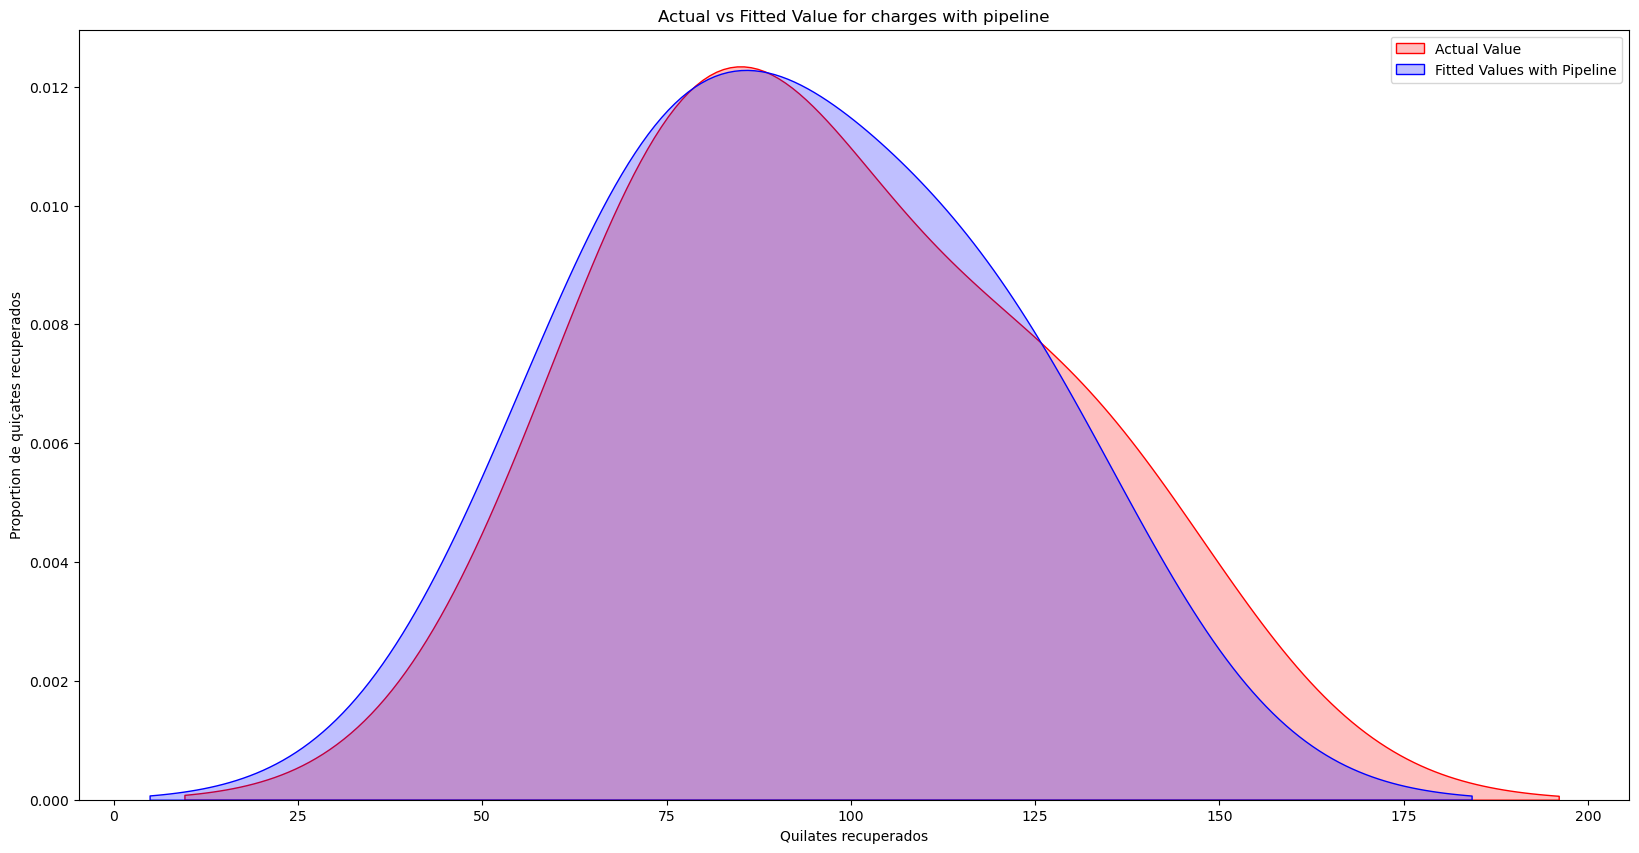

In [196]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_test_ter, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_ter_test, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [197]:
R_squared_Ridge_Polly = r2_score(y_test_ter, Yhat_Ridge_Polly_ter_test)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.9066704392338027


* **Validação Cruzada**

In [198]:
Rcross_Polly = cross_val_score(RidgeModelo_ter, x_train_pr_ter2, y_train_ter, cv = 3)
print('The mean of the folds are:', Rcross_Polly.mean())

The mean of the folds are: 0.9742340395504087


## **TERRAÇO FLUVIAL DEPOSITO**

In [199]:
TER_FL = df.loc[df['Deposito'] == 'TER-FLUVIAL']

---
* **Regressão Linear**
---

* **Volume**

In [200]:
x_ter_fl1 = TER_FL[['Volume']]
Y_ter_fl = TER_FL['Qts']

In [201]:
lr_ter_fl1 = lm.fit(x_ter_fl1, Y_ter_fl)
lr_ter_fl1

LinearRegression()

In [202]:
# Produce a prediction 
Yhat_lr_ter_fl1 = lr_ter_fl1.predict(x_ter_fl1)
Yhat_lr_ter_fl1[0:5].round(2)

array([ 86.28, 185.36, 138.43, 280.82, 181.75])

In [203]:
# Final Estimaded Linear for the model above
Yhat_lr_ter_fl1 = lr_ter_fl1.intercept_ + lr_ter_fl1.coef_ * TER_FL['Volume']
Yhat_lr_ter_fl1[0:5].round(2)

3      86.28
5     185.36
15    138.43
24    280.82
25    181.75
Name: Volume, dtype: float64

In [204]:
# Calculate de R^2
R_squared_lr1 = r2_score(Y_ter_fl, lr_ter_fl1.predict(x_ter_fl1))
print('R_squared is:', R_squared_lr1)

R_squared is: 0.657854995770097


* **Teor**

In [205]:
x_ter_fl2 = TER_FL[['Teor']]

In [206]:
# Ajustar o modelo com uma nova variável 
lr_ter_fl2 = lm.fit(x_ter_fl2, Y_ter_fl)
lr_ter_fl2

LinearRegression()

In [207]:
# Produce a prediction 
Yhat_lr_ter_lez2 = lr_ter_lez2.predict(x_ter_lez2)
Yhat_lr_ter_lez2[0:5].round(2)

array([156.44, 156.44, 140.  , 156.44, 287.99])

In [208]:
# Produce a prediction 
Yhat_lr_ter_fl2 = lr_ter_fl2.predict(x_ter_fl2)
Yhat_lr_ter_fl2[0:5].round(2)

array([189.33, 107.12, 238.66, 172.89, 222.21])

In [209]:
# Final Estimaded Linear for the model above
qts_lr_ter_fl2 = lr_ter_fl2.intercept_ + lr_ter_fl2.coef_ * TER_FL['Teor']
qts_lr_ter_fl2[0:5].round(2)

3     189.33
5     107.12
15    238.66
24    172.89
25    222.21
Name: Teor, dtype: float64

In [210]:
# Calculate de R^2
R_squared_lr2 = lr_ter_fl2.score(x_ter_fl2, Y_ter_fl)
print('R_squared is:', R_squared_lr2 )

R_squared is: 0.303943100026395


---
* **Multiple Linear Regression**:

In [211]:
Z_ter_fl1 = TER_FL[['Volume', 'Teor']]

In [212]:
lr_ter_fl3 = lm.fit(Z_ter_fl1, Y_ter_fl)
lr_ter_fl3

LinearRegression()

In [213]:
# Produce a prediction 
Yhat_lr_ter_fl3 = lr_ter_fl3.predict(Z_ter_fl1)
Yhat_lr_ter_fl3[0:5].round(2)

array([ 92.28, 118.5 , 178.54, 257.22, 205.27])

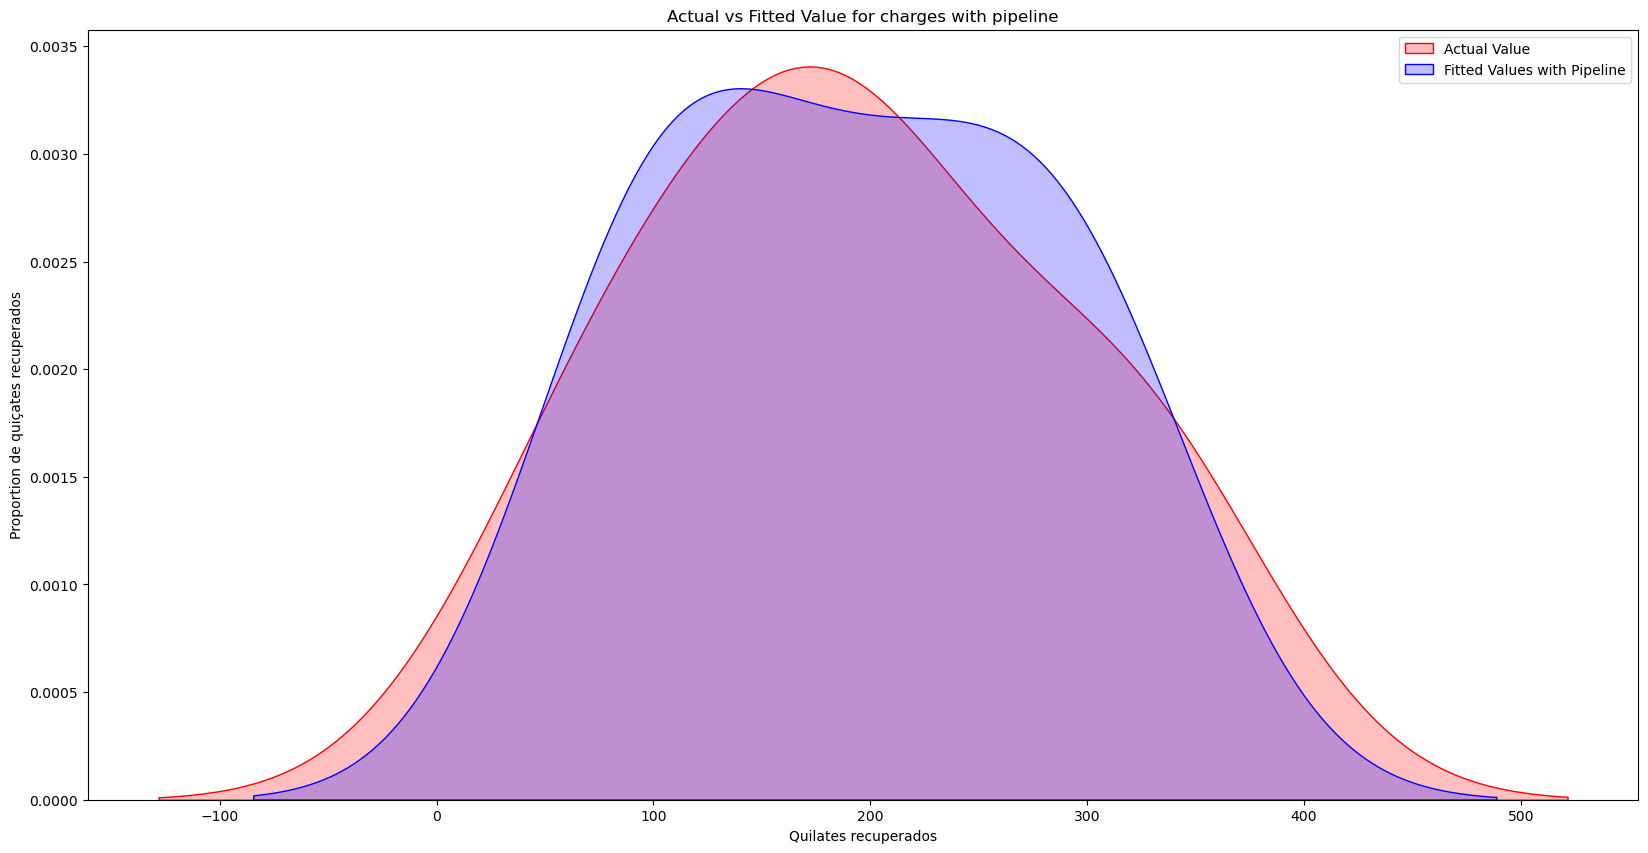

In [214]:
plt.figure(figsize=(20, 10))

ax1 = srn   .kdeplot(Y_ter_fl, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_lr_ter_fl3, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [215]:
R_squared_lr3 = lr_ter_fl3.score(Z_ter_fl1 , Y_ter_fl)
print('R_squared is:', R_squared_lr3)

R_squared is: 0.8391032532396834


---
**Regressão Polinomial**

In [216]:
# Create a polynomial feature obbject of degree 2
pr_ter_fl1 = PolynomialFeatures(degree=2)
print(pr_ter_fl1)

PolynomialFeatures()


In [217]:
Z_ter_fl1.isnull().sum()

Volume    0
Teor      0
dtype: int64

In [218]:
# Fit and transform the data into a polynomial 
Z_pr_ter_fl1 = pr_ter_fl1.fit_transform(Z_ter_fl1)
print(Z_ter_fl1.shape)
print(Z_pr_ter_fl1.shape)

(8, 2)
(8, 6)


In [219]:
input_ter_fl = [('Scale', StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
input_ter_fl

[('Scale', StandardScaler()),
 ('Polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [220]:
pipe_ter_fl = Pipeline(input_ter_fl)
pipe_ter_fl 

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [221]:
feature_ter_fl1 = Z_ter_fl1.astype(float)
pipe_ter_fl.fit(feature_ter_fl1, Y_ter_fl)

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [222]:
Yhat_pipe_ter_fl = pipe_ter_fl.predict(feature_ter_fl1)
Yhat_pipe_ter_fl[0:5]

array([ 86.61666382,  99.3845915 , 128.64386775, 226.77490348,
       214.48073646])

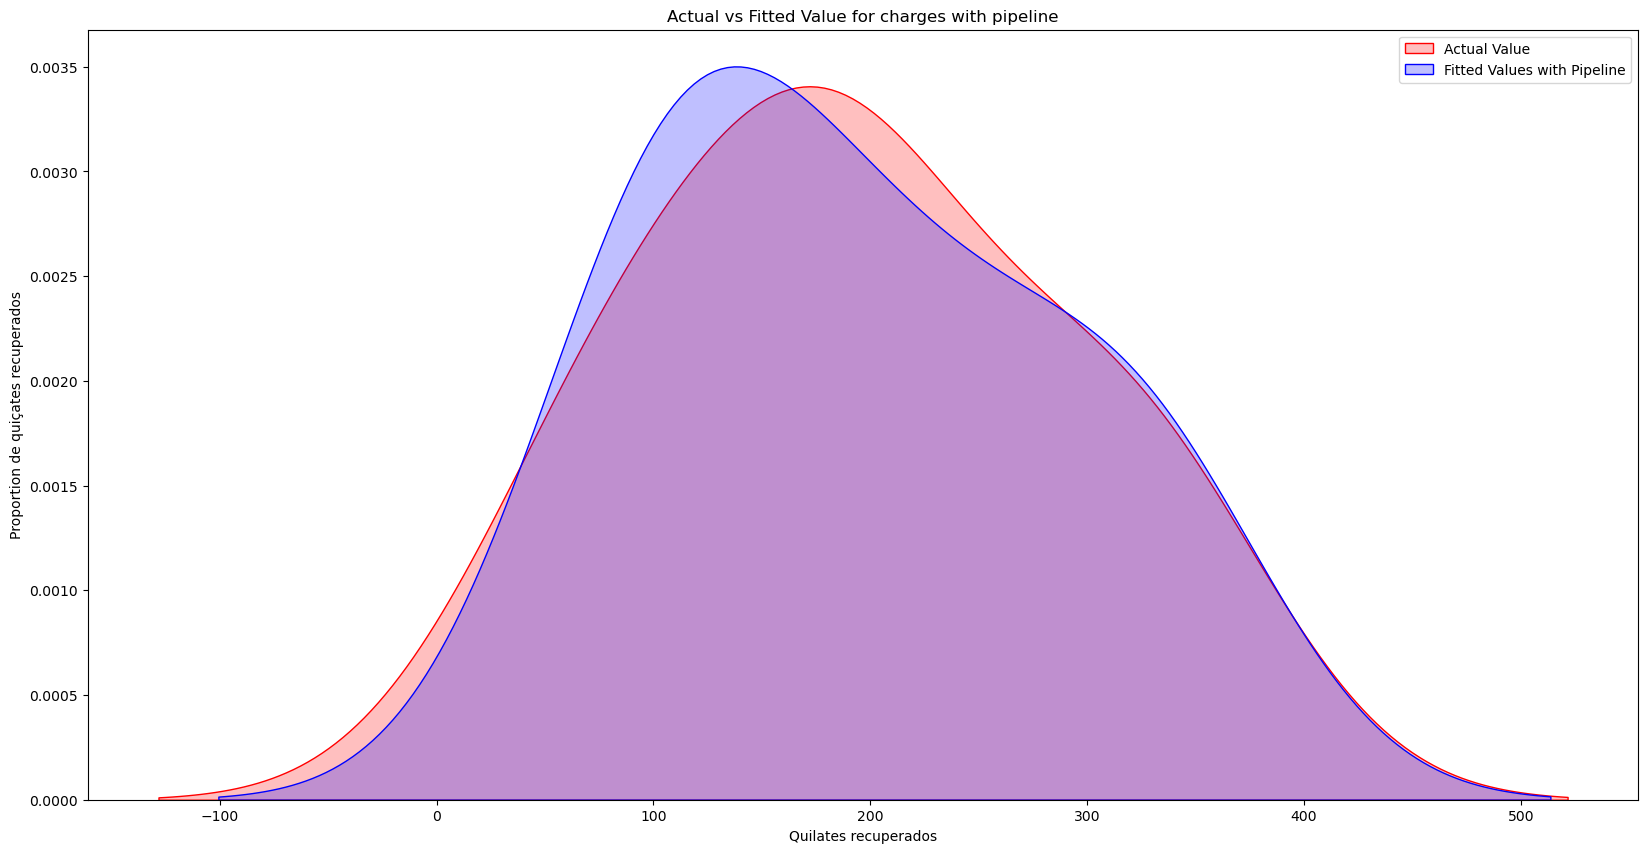

In [240]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(Y_ter_fl, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_pipe_ter_fl, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [224]:
R_squared = r2_score(Y_ter_fl, pipe_ter_fl.predict(feature_ter_fl1))
print('R_squared:', R_squared)

R_squared: 0.9578863314975445


#### **Quinta Tarefa**

* Avaliação e Ajustamento do Modelo 

In [225]:
features_ter_fl2 =  ['Volume', 'Teor']
Z_ter_fl2 = TER_FL[features_ter_fl2]

In [226]:
x_train_ter_fl, x_test_ter_fl, y_train_ter_fl, y_test_ter_fl = train_test_split(Z_ter_fl2, Y_ter_fl, test_size=0.15, random_state=1)

print('Number of training samples:', x_train_ter_fl.shape[0])
print('Number of test samples:', x_test_ter_fl.shape[0])

Number of training samples: 6
Number of test samples: 2


In [227]:
RidgeModelo_ter_fl = Ridge(alpha=0.1)
RidgeModelo_ter_fl.fit(x_train_ter_fl, y_train_ter_fl)

Ridge(alpha=0.1)

In [228]:
R_squared_Ridge = r2_score(y_test_ter_fl, RidgeModelo_ter_fl.predict(x_test_ter_fl))
print('The R-squared value is:', R_squared_Ridge)

The R-squared value is: 0.13894825212537376


In [229]:
pr_ter_fl2 = PolynomialFeatures(degree=2)
x_train_pr_ter_fl2 = pr_ter_fl2.fit_transform(x_train_ter_fl)
x_test_pr_ter_fl2 = pr_ter_fl2.fit_transform(x_test_ter_fl)
pr_ter_fl2

PolynomialFeatures()

In [230]:
print(x_train_pr_ter_fl2.shape)
print(x_test_pr_ter_fl2.shape)

(6, 6)
(2, 6)


In [231]:
RidgeModelo_ter_fl.fit(x_train_pr_ter_fl2, y_train_ter_fl)

Ridge(alpha=0.1)

* **Treinamento**

In [232]:
Yhat_Ridge_Polly_ter_fl = RidgeModelo_ter_fl.predict(x_train_pr_ter_fl2)
Yhat_Ridge_Polly_ter_fl[0:5]

array([109.70180576, 317.79181654,  96.98996825, 204.64542283,
       240.66728928])

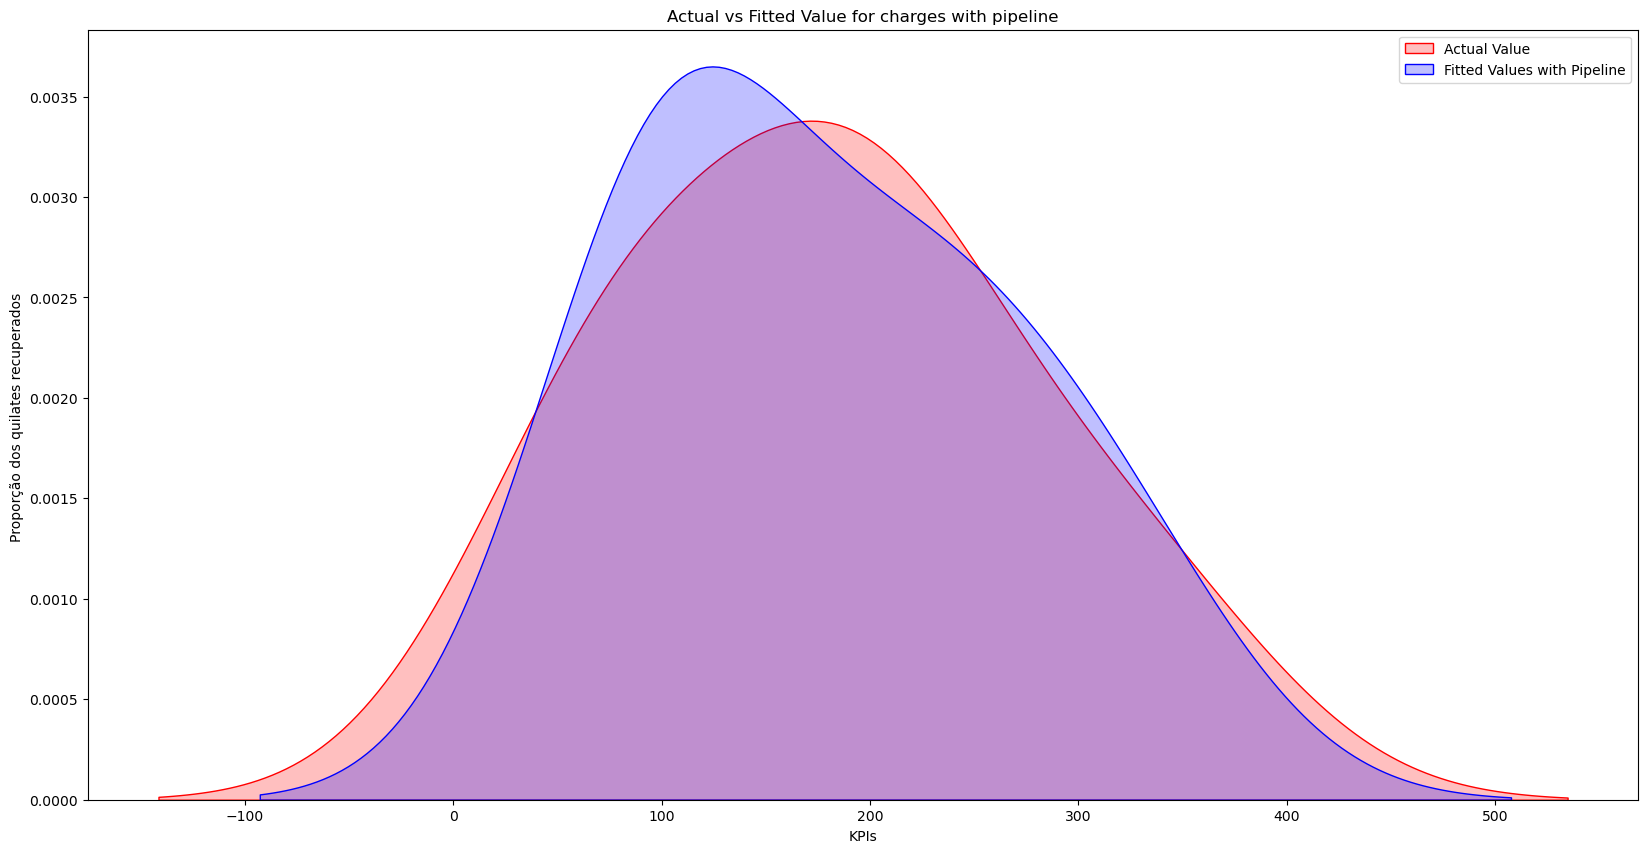

In [233]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_train_ter_fl, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_ter_fl, color='b', label='Fitted Values with Pipeline', fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('KPIs')
plt.ylabel('Proporção dos quilates recuperados ')

plt.legend()

plt.show()

In [234]:
R_squared_Ridge_Polly = r2_score(y_train_ter_fl, Yhat_Ridge_Polly_ter_fl)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.8618735179215754


* **Teste**

In [235]:
Yhat_Ridge_Polly_ter_fl_test = RidgeModelo_ter_fl.predict(x_test_pr_ter_fl2)
Yhat_Ridge_Polly_ter_fl_test[0:5]

array([313.33103033, 170.54437552])

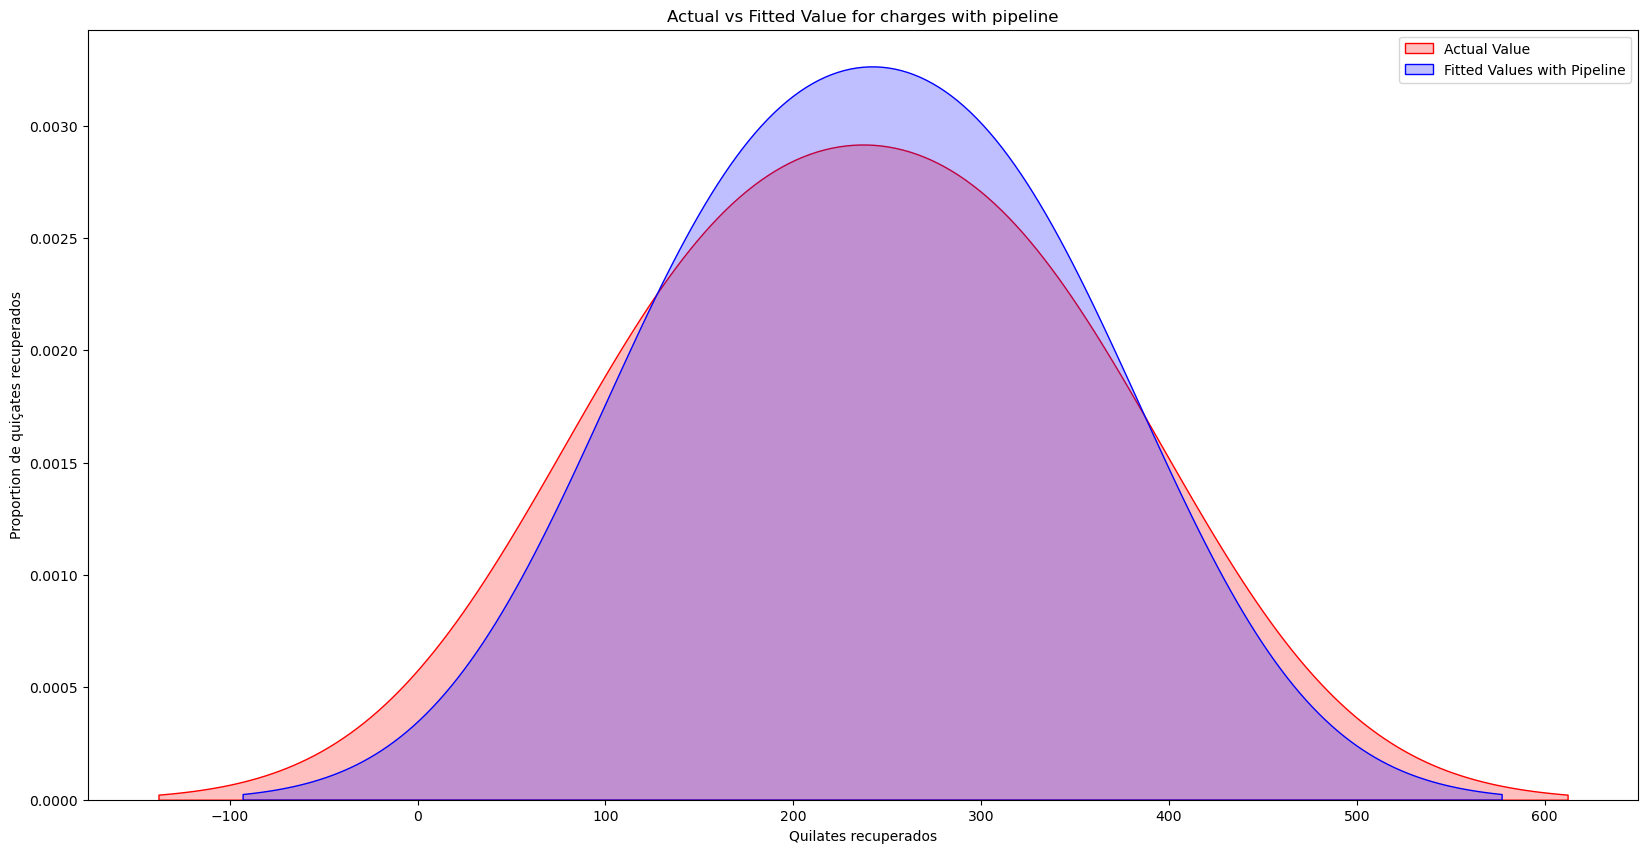

In [236]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_test_ter_fl, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly_ter_fl_test, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Quilates recuperados')
plt.ylabel('Proportion de quiçates recuperados')

plt.legend()        

plt.show()

In [237]:
R_squared_Ridge_Polly = r2_score(y_test_ter_fl, Yhat_Ridge_Polly_ter_fl_test)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.9849799200615864


* **Validação Cruzada**

In [238]:
Rcross_Polly = cross_val_score(RidgeModelo_ter_fl, x_train_pr_ter_fl2, y_train_ter_fl, cv = 3)
print('The mean of the folds are:', Rcross_Polly.mean())

The mean of the folds are: -14.745744156794203


## **Conclusão**:

Como conclusão podemos definir quais modelos são os melhores para cada tipo de depósito segundo a validação feita. 

* Modelo de Regressão Simples: 

    - 1. Depósito de leziria 

* Modelo de Regressão Múltipla: 

    - 1. Depósito de Leziria 

    - 2. Depósito de Terraço-Lezíria 

* Modelo de Regressão Polinomial 

    - 1. Depósito de Leziria 

    - 2. Depósito Terraço-Leziria

    - 3. Depósito de Terraço 

    - 4. Depósito de Terraço-Fluvial 


* Modelo de Regressão de Ridge 

    - 1. Depósito de Leziria 

    - 3. Depósito de Terraço

    - 2. Depósito de Terraço-Fluvial 



Se pode notar que existem modelos que têm a acurácia para prever os quilates a serem recuperados de maneira mais 'precisa' em vários depositos. Como há outros que intensificam a precisão na previsão de alguns depósitos em detrenimento de outros.